In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 128.", name="epoch 2,000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=2000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16768     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 19,993
Trainable params: 19,993
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/2000
4/5 [=======================>......] - ETA: 0s - loss: 1.0891 - mae: 0.8940INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 623ms/step - loss: 1.0544 - mae: 0.8776 - val_loss: 0.5330 - val_mae: 0.5986
Epoch 2/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.4145 - mae: 0.5203INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 0.3955 - mae: 0.5052 - val_loss: 0.2160 - val_mae: 0.3808
Epoch 3/2000
5/5 [==============================] - ETA: 0s - loss: 0.1850 - mae: 0.3515INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 483ms/step - loss: 0.1850 - mae: 0.3515 - val_loss: 0.1595 - val_mae: 0.3242
Epoch 4/2000
5/5 [==============================] - ETA: 0s - loss: 0.1507 - mae: 0.3138INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.1507 - mae: 0.3138 - val_loss: 0.1090 - val_mae: 0.2649
Epoch 5/2000
5/5 [==============================] - ETA: 0s - loss: 0.1058 - mae: 0.2600INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.1058 - mae: 0.2600 - val_loss: 0.0892 - val_mae: 0.2395
Epoch 6/2000
5/5 [==============================] - ETA: 0s - loss: 0.0849 - mae: 0.2311INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 524ms/step - loss: 0.0849 - mae: 0.2311 - val_loss: 0.0764 - val_mae: 0.2200
Epoch 7/2000
5/5 [==============================] - 1s 171ms/step - loss: 0.0780 - mae: 0.2195 - val_loss: 0.0776 - val_mae: 0.2208
Epoch 8/2000
5/5 [==============================] - ETA: 0s - loss: 0.0769 - mae: 0.2174INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0769 - mae: 0.2174 - val_loss: 0.0709 - val_mae: 0.2111
Epoch 9/2000
5/5 [==============================] - ETA: 0s - loss: 0.0688 - mae: 0.2039INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0688 - mae: 0.2039 - val_loss: 0.0637 - val_mae: 0.1987
Epoch 10/2000
5/5 [==============================] - ETA: 0s - loss: 0.0645 - mae: 0.1982INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0645 - mae: 0.1982 - val_loss: 0.0627 - val_mae: 0.1967
Epoch 11/2000
5/5 [==============================] - ETA: 0s - loss: 0.0620 - mae: 0.1937INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0620 - mae: 0.1937 - val_loss: 0.0597 - val_mae: 0.1908
Epoch 12/2000
5/5 [==============================] - 1s 160ms/step - loss: 0.0593 - mae: 0.1893 - val_loss: 0.0600 - val_mae: 0.1902
Epoch 13/2000
5/5 [==============================] - ETA: 0s - loss: 0.0593 - mae: 0.1894INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.0593 - mae: 0.1894 - val_loss: 0.0581 - val_mae: 0.1856
Epoch 14/2000
5/5 [==============================] - 1s 164ms/step - loss: 0.0581 - mae: 0.1872 - val_loss: 0.0591 - val_mae: 0.1855
Epoch 15/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0570 - mae: 0.1851 - val_loss: 0.0582 - val_mae: 0.1843
Epoch 16/2000
5/5 [==============================] - ETA: 0s - loss: 0.0558 - mae: 0.1822INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0558 - mae: 0.1822 - val_loss: 0.0580 - val_mae: 0.1833
Epoch 17/2000
5/5 [==============================] - ETA: 0s - loss: 0.0549 - mae: 0.1806INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0549 - mae: 0.1806 - val_loss: 0.0557 - val_mae: 0.1806
Epoch 18/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.0556 - mae: 0.1813 - val_loss: 0.0586 - val_mae: 0.1837
Epoch 19/2000
5/5 [==============================] - ETA: 0s - loss: 0.0552 - mae: 0.1804INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0552 - mae: 0.1804 - val_loss: 0.0556 - val_mae: 0.1795
Epoch 20/2000
5/5 [==============================] - ETA: 0s - loss: 0.0542 - mae: 0.1791INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 540ms/step - loss: 0.0542 - mae: 0.1791 - val_loss: 0.0554 - val_mae: 0.1804
Epoch 21/2000
5/5 [==============================] - ETA: 0s - loss: 0.0537 - mae: 0.1779INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 476ms/step - loss: 0.0537 - mae: 0.1779 - val_loss: 0.0551 - val_mae: 0.1794
Epoch 22/2000
5/5 [==============================] - ETA: 0s - loss: 0.0538 - mae: 0.1789INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 548ms/step - loss: 0.0538 - mae: 0.1789 - val_loss: 0.0544 - val_mae: 0.1795
Epoch 23/2000
5/5 [==============================] - ETA: 0s - loss: 0.0541 - mae: 0.1791INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 525ms/step - loss: 0.0541 - mae: 0.1791 - val_loss: 0.0540 - val_mae: 0.1776
Epoch 24/2000
5/5 [==============================] - 1s 164ms/step - loss: 0.0530 - mae: 0.1772 - val_loss: 0.0541 - val_mae: 0.1790
Epoch 25/2000
5/5 [==============================] - ETA: 0s - loss: 0.0516 - mae: 0.1736INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 0.0516 - mae: 0.1736 - val_loss: 0.0528 - val_mae: 0.1773
Epoch 26/2000
5/5 [==============================] - 1s 171ms/step - loss: 0.0508 - mae: 0.1729 - val_loss: 0.0538 - val_mae: 0.1816
Epoch 27/2000
5/5 [==============================] - ETA: 0s - loss: 0.0510 - mae: 0.1739INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 513ms/step - loss: 0.0510 - mae: 0.1739 - val_loss: 0.0525 - val_mae: 0.1771
Epoch 28/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.0504 - mae: 0.1721 - val_loss: 0.0576 - val_mae: 0.1939
Epoch 29/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0516 - mae: 0.1761 - val_loss: 0.0526 - val_mae: 0.1792
Epoch 30/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0488 - mae: 0.1700 - val_loss: 0.0530 - val_mae: 0.1823
Epoch 31/2000
5/5 [==============================] - ETA: 0s - loss: 0.0490 - mae: 0.1708INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0490 - mae: 0.1708 - val_loss: 0.0525 - val_mae: 0.1810
Epoch 32/2000
5/5 [==============================] - ETA: 0s - loss: 0.0477 - mae: 0.1690INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0477 - mae: 0.1690 - val_loss: 0.0490 - val_mae: 0.1702
Epoch 33/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.0455 - mae: 0.1640 - val_loss: 0.0495 - val_mae: 0.1673
Epoch 34/2000
5/5 [==============================] - ETA: 0s - loss: 0.0444 - mae: 0.1628INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.0444 - mae: 0.1628 - val_loss: 0.0462 - val_mae: 0.1640
Epoch 35/2000
5/5 [==============================] - ETA: 0s - loss: 0.0426 - mae: 0.1585INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 483ms/step - loss: 0.0426 - mae: 0.1585 - val_loss: 0.0449 - val_mae: 0.1635
Epoch 36/2000
5/5 [==============================] - ETA: 0s - loss: 0.0410 - mae: 0.1547INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 538ms/step - loss: 0.0410 - mae: 0.1547 - val_loss: 0.0433 - val_mae: 0.1615
Epoch 37/2000
5/5 [==============================] - ETA: 0s - loss: 0.0395 - mae: 0.1523INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0395 - mae: 0.1523 - val_loss: 0.0423 - val_mae: 0.1609
Epoch 38/2000
5/5 [==============================] - ETA: 0s - loss: 0.0387 - mae: 0.1516INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0387 - mae: 0.1516 - val_loss: 0.0409 - val_mae: 0.1572
Epoch 39/2000
5/5 [==============================] - ETA: 0s - loss: 0.0373 - mae: 0.1483INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 529ms/step - loss: 0.0373 - mae: 0.1483 - val_loss: 0.0397 - val_mae: 0.1564
Epoch 40/2000
5/5 [==============================] - ETA: 0s - loss: 0.0364 - mae: 0.1474INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 529ms/step - loss: 0.0364 - mae: 0.1474 - val_loss: 0.0384 - val_mae: 0.1539
Epoch 41/2000
5/5 [==============================] - ETA: 0s - loss: 0.0354 - mae: 0.1458INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 533ms/step - loss: 0.0354 - mae: 0.1458 - val_loss: 0.0376 - val_mae: 0.1509
Epoch 42/2000
5/5 [==============================] - ETA: 0s - loss: 0.0340 - mae: 0.1428INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 497ms/step - loss: 0.0340 - mae: 0.1428 - val_loss: 0.0355 - val_mae: 0.1456
Epoch 43/2000
5/5 [==============================] - ETA: 0s - loss: 0.0322 - mae: 0.1385INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 517ms/step - loss: 0.0322 - mae: 0.1385 - val_loss: 0.0334 - val_mae: 0.1434
Epoch 44/2000
5/5 [==============================] - ETA: 0s - loss: 0.0306 - mae: 0.1348INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 507ms/step - loss: 0.0306 - mae: 0.1348 - val_loss: 0.0315 - val_mae: 0.1387
Epoch 45/2000
5/5 [==============================] - ETA: 0s - loss: 0.0296 - mae: 0.1320INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0296 - mae: 0.1320 - val_loss: 0.0305 - val_mae: 0.1374
Epoch 46/2000
5/5 [==============================] - ETA: 0s - loss: 0.0284 - mae: 0.1304INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 0.0284 - mae: 0.1304 - val_loss: 0.0291 - val_mae: 0.1343
Epoch 47/2000
5/5 [==============================] - ETA: 0s - loss: 0.0263 - mae: 0.1251INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 536ms/step - loss: 0.0263 - mae: 0.1251 - val_loss: 0.0275 - val_mae: 0.1316
Epoch 48/2000
5/5 [==============================] - ETA: 0s - loss: 0.0253 - mae: 0.1231INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 0.0253 - mae: 0.1231 - val_loss: 0.0262 - val_mae: 0.1288
Epoch 49/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0240 - mae: 0.1201 - val_loss: 0.0273 - val_mae: 0.1299
Epoch 50/2000
5/5 [==============================] - ETA: 0s - loss: 0.0243 - mae: 0.1211INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 480ms/step - loss: 0.0243 - mae: 0.1211 - val_loss: 0.0241 - val_mae: 0.1236
Epoch 51/2000
5/5 [==============================] - ETA: 0s - loss: 0.0223 - mae: 0.1160INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 518ms/step - loss: 0.0223 - mae: 0.1160 - val_loss: 0.0232 - val_mae: 0.1218
Epoch 52/2000
5/5 [==============================] - ETA: 0s - loss: 0.0216 - mae: 0.1143INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 0.0216 - mae: 0.1143 - val_loss: 0.0221 - val_mae: 0.1191
Epoch 53/2000
5/5 [==============================] - ETA: 0s - loss: 0.0206 - mae: 0.1114INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 548ms/step - loss: 0.0206 - mae: 0.1114 - val_loss: 0.0213 - val_mae: 0.1163
Epoch 54/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0199 - mae: 0.1093 - val_loss: 0.0213 - val_mae: 0.1167
Epoch 55/2000
5/5 [==============================] - 1s 142ms/step - loss: 0.0194 - mae: 0.1083 - val_loss: 0.0217 - val_mae: 0.1173
Epoch 56/2000
5/5 [==============================] - ETA: 0s - loss: 0.0197 - mae: 0.1095INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 0.0197 - mae: 0.1095 - val_loss: 0.0200 - val_mae: 0.1126
Epoch 57/2000
5/5 [==============================] - 1s 156ms/step - loss: 0.0203 - mae: 0.1119 - val_loss: 0.0202 - val_mae: 0.1126
Epoch 58/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0184 - mae: 0.1060 - val_loss: 0.0217 - val_mae: 0.1163
Epoch 59/2000
5/5 [==============================] - ETA: 0s - loss: 0.0185 - mae: 0.1062INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 471ms/step - loss: 0.0185 - mae: 0.1062 - val_loss: 0.0192 - val_mae: 0.1098
Epoch 60/2000
5/5 [==============================] - ETA: 0s - loss: 0.0172 - mae: 0.1020INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0172 - mae: 0.1020 - val_loss: 0.0172 - val_mae: 0.1038
Epoch 61/2000
5/5 [==============================] - ETA: 0s - loss: 0.0159 - mae: 0.0979INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.0159 - mae: 0.0979 - val_loss: 0.0169 - val_mae: 0.1033
Epoch 62/2000
5/5 [==============================] - 1s 161ms/step - loss: 0.0157 - mae: 0.0978 - val_loss: 0.0171 - val_mae: 0.1038
Epoch 63/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0153 - mae: 0.0965INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0151 - mae: 0.0959 - val_loss: 0.0163 - val_mae: 0.1018
Epoch 64/2000
5/5 [==============================] - ETA: 0s - loss: 0.0146 - mae: 0.0944INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 517ms/step - loss: 0.0146 - mae: 0.0944 - val_loss: 0.0161 - val_mae: 0.1010
Epoch 65/2000
5/5 [==============================] - ETA: 0s - loss: 0.0144 - mae: 0.0942INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0144 - mae: 0.0942 - val_loss: 0.0155 - val_mae: 0.0983
Epoch 66/2000
5/5 [==============================] - ETA: 0s - loss: 0.0148 - mae: 0.0948INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 0.0148 - mae: 0.0948 - val_loss: 0.0151 - val_mae: 0.0969
Epoch 67/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.0142 - mae: 0.0938 - val_loss: 0.0168 - val_mae: 0.1028
Epoch 68/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0140 - mae: 0.0925 - val_loss: 0.0156 - val_mae: 0.0992
Epoch 69/2000
5/5 [==============================] - ETA: 0s - loss: 0.0136 - mae: 0.0912INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0136 - mae: 0.0912 - val_loss: 0.0148 - val_mae: 0.0959
Epoch 70/2000
5/5 [==============================] - ETA: 0s - loss: 0.0132 - mae: 0.0901INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.0132 - mae: 0.0901 - val_loss: 0.0141 - val_mae: 0.0932
Epoch 71/2000
5/5 [==============================] - ETA: 0s - loss: 0.0132 - mae: 0.0899INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0132 - mae: 0.0899 - val_loss: 0.0139 - val_mae: 0.0925
Epoch 72/2000
5/5 [==============================] - 1s 168ms/step - loss: 0.0128 - mae: 0.0899 - val_loss: 0.0142 - val_mae: 0.0947
Epoch 73/2000
5/5 [==============================] - ETA: 0s - loss: 0.0129 - mae: 0.0894INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0129 - mae: 0.0894 - val_loss: 0.0133 - val_mae: 0.0904
Epoch 74/2000
5/5 [==============================] - 1s 188ms/step - loss: 0.0124 - mae: 0.0873 - val_loss: 0.0134 - val_mae: 0.0918
Epoch 75/2000
5/5 [==============================] - ETA: 0s - loss: 0.0123 - mae: 0.0874INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0123 - mae: 0.0874 - val_loss: 0.0132 - val_mae: 0.0905
Epoch 76/2000
5/5 [==============================] - ETA: 0s - loss: 0.0117 - mae: 0.0852INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.0117 - mae: 0.0852 - val_loss: 0.0131 - val_mae: 0.0894
Epoch 77/2000
5/5 [==============================] - 1s 170ms/step - loss: 0.0116 - mae: 0.0849 - val_loss: 0.0141 - val_mae: 0.0944
Epoch 78/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0123 - mae: 0.0882 - val_loss: 0.0135 - val_mae: 0.0913
Epoch 79/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0129 - mae: 0.0895 - val_loss: 0.0133 - val_mae: 0.0906
Epoch 80/2000
5/5 [==============================] - ETA: 0s - loss: 0.0131 - mae: 0.0912INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0131 - mae: 0.0912 - val_loss: 0.0120 - val_mae: 0.0861
Epoch 81/2000
5/5 [==============================] - 1s 162ms/step - loss: 0.0125 - mae: 0.0874 - val_loss: 0.0153 - val_mae: 0.0985
Epoch 82/2000
5/5 [==============================] - 1s 159ms/step - loss: 0.0126 - mae: 0.0898 - val_loss: 0.0138 - val_mae: 0.0925
Epoch 83/2000
5/5 [==============================] - ETA: 0s - loss: 0.0116 - mae: 0.0848INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0116 - mae: 0.0848 - val_loss: 0.0116 - val_mae: 0.0843
Epoch 84/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0110 - mae: 0.0823 - val_loss: 0.0122 - val_mae: 0.0868
Epoch 85/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0108 - mae: 0.0819 - val_loss: 0.0127 - val_mae: 0.0883
Epoch 86/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0112 - mae: 0.0832 - val_loss: 0.0118 - val_mae: 0.0859
Epoch 87/2000
5/5 [==============================] - ETA: 0s - loss: 0.0100 - mae: 0.0794INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 493ms/step - loss: 0.0100 - mae: 0.0794 - val_loss: 0.0113 - val_mae: 0.0835
Epoch 88/2000
5/5 [==============================] - 1s 165ms/step - loss: 0.0102 - mae: 0.0798 - val_loss: 0.0118 - val_mae: 0.0858
Epoch 89/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0100 - mae: 0.0785 - val_loss: 0.0124 - val_mae: 0.0884
Epoch 90/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.0101 - mae: 0.0795 - val_loss: 0.0124 - val_mae: 0.0879
Epoch 91/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.0108 - mae: 0.0825 - val_loss: 0.0114 - val_mae: 0.0845
Epoch 92/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0102 - mae: 0.0797INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 465ms/step - loss: 0.0100 - mae: 0.0789 - val_loss: 0.0106 - val_mae: 0.0808
Epoch 93/2000
5/5 [==============================] - 1s 169ms/step - loss: 0.0093 - mae: 0.0765 - val_loss: 0.0109 - val_mae: 0.0822
Epoch 94/2000
5/5 [==============================] - ETA: 0s - loss: 0.0089 - mae: 0.0748INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0089 - mae: 0.0748 - val_loss: 0.0104 - val_mae: 0.0796
Epoch 95/2000
5/5 [==============================] - ETA: 0s - loss: 0.0090 - mae: 0.0750INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0090 - mae: 0.0750 - val_loss: 0.0103 - val_mae: 0.0796
Epoch 96/2000
5/5 [==============================] - ETA: 0s - loss: 0.0092 - mae: 0.0759INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 493ms/step - loss: 0.0092 - mae: 0.0759 - val_loss: 0.0103 - val_mae: 0.0794
Epoch 97/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0088 - mae: 0.0744 - val_loss: 0.0121 - val_mae: 0.0869
Epoch 98/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.0096 - mae: 0.0780 - val_loss: 0.0112 - val_mae: 0.0842
Epoch 99/2000
5/5 [==============================] - ETA: 0s - loss: 0.0092 - mae: 0.0768INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0092 - mae: 0.0768 - val_loss: 0.0100 - val_mae: 0.0795
Epoch 100/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0088 - mae: 0.0748 - val_loss: 0.0103 - val_mae: 0.0793
Epoch 101/2000
5/5 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0723INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 0.0083 - mae: 0.0723 - val_loss: 0.0099 - val_mae: 0.0789
Epoch 102/2000
5/5 [==============================] - ETA: 0s - loss: 0.0084 - mae: 0.0727INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0084 - mae: 0.0727 - val_loss: 0.0097 - val_mae: 0.0767
Epoch 103/2000
5/5 [==============================] - 1s 161ms/step - loss: 0.0083 - mae: 0.0719 - val_loss: 0.0102 - val_mae: 0.0793
Epoch 104/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0085 - mae: 0.0734 - val_loss: 0.0105 - val_mae: 0.0801
Epoch 105/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0085 - mae: 0.0730 - val_loss: 0.0100 - val_mae: 0.0787
Epoch 106/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0081 - mae: 0.0714 - val_loss: 0.0098 - val_mae: 0.0776
Epoch 107/2000
5/5 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0703INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 0.0079 - mae: 0.0703 - val_loss: 0.0091 - val_mae: 0.0752
Epoch 108/2000
5/5 [==============================] - 1s 160ms/step - loss: 0.0077 - mae: 0.0696 - val_loss: 0.0094 - val_mae: 0.0757
Epoch 109/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0079 - mae: 0.0701 - val_loss: 0.0105 - val_mae: 0.0822
Epoch 110/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0087 - mae: 0.0745 - val_loss: 0.0099 - val_mae: 0.0779
Epoch 111/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0080 - mae: 0.0706 - val_loss: 0.0093 - val_mae: 0.0751
Epoch 112/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0086 - mae: 0.0728 - val_loss: 0.0117 - val_mae: 0.0879
Epoch 113/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0091 - mae: 0.0763 - val_loss: 0.0112 - val_mae: 0.0821
Epoch 114/2000
5/5 [==============================] - 1s 148ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 469ms/step - loss: 0.0081 - mae: 0.0719 - val_loss: 0.0088 - val_mae: 0.0731
Epoch 117/2000
5/5 [==============================] - ETA: 0s - loss: 0.0077 - mae: 0.0694INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 513ms/step - loss: 0.0077 - mae: 0.0694 - val_loss: 0.0083 - val_mae: 0.0713
Epoch 118/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0073 - mae: 0.0675 - val_loss: 0.0087 - val_mae: 0.0738
Epoch 119/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0073 - mae: 0.0679 - val_loss: 0.0084 - val_mae: 0.0721
Epoch 120/2000
5/5 [==============================] - ETA: 0s - loss: 0.0069 - mae: 0.0660INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0069 - mae: 0.0660 - val_loss: 0.0083 - val_mae: 0.0711
Epoch 121/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.0071 - mae: 0.0673 - val_loss: 0.0090 - val_mae: 0.0764
Epoch 122/2000
5/5 [==============================] - ETA: 0s - loss: 0.0072 - mae: 0.0675INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0072 - mae: 0.0675 - val_loss: 0.0082 - val_mae: 0.0711
Epoch 123/2000
5/5 [==============================] - ETA: 0s - loss: 0.0067 - mae: 0.0653INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0067 - mae: 0.0653 - val_loss: 0.0078 - val_mae: 0.0692
Epoch 124/2000
5/5 [==============================] - 1s 173ms/step - loss: 0.0066 - mae: 0.0642 - val_loss: 0.0080 - val_mae: 0.0703
Epoch 125/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0063 - mae: 0.0629 - val_loss: 0.0078 - val_mae: 0.0692
Epoch 126/2000
5/5 [==============================] - ETA: 0s - loss: 0.0062 - mae: 0.0623INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0062 - mae: 0.0623 - val_loss: 0.0075 - val_mae: 0.0682
Epoch 127/2000
5/5 [==============================] - 1s 168ms/step - loss: 0.0062 - mae: 0.0629 - val_loss: 0.0083 - val_mae: 0.0714
Epoch 128/2000
5/5 [==============================] - ETA: 0s - loss: 0.0066 - mae: 0.0648INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.0066 - mae: 0.0648 - val_loss: 0.0073 - val_mae: 0.0668
Epoch 129/2000
5/5 [==============================] - 1s 161ms/step - loss: 0.0064 - mae: 0.0633 - val_loss: 0.0079 - val_mae: 0.0695
Epoch 130/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0066 - mae: 0.0645 - val_loss: 0.0084 - val_mae: 0.0723
Epoch 131/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0065 - mae: 0.0642 - val_loss: 0.0087 - val_mae: 0.0750
Epoch 132/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0067 - mae: 0.0652 - val_loss: 0.0079 - val_mae: 0.0714
Epoch 133/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0063 - mae: 0.0636 - val_loss: 0.0076 - val_mae: 0.0690
Epoch 134/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0063 - mae: 0.0632 - val_loss: 0.0076 - val_mae: 0.0686
Epoch 135/2000
5/5 [==============================] - ETA: 0s - loss: 0.0060 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0060 - mae: 0.0613 - val_loss: 0.0072 - val_mae: 0.0667
Epoch 136/2000
5/5 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0602INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0057 - mae: 0.0602 - val_loss: 0.0071 - val_mae: 0.0673
Epoch 137/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.0058 - mae: 0.0601 - val_loss: 0.0074 - val_mae: 0.0676
Epoch 138/2000
5/5 [==============================] - ETA: 0s - loss: 0.0059 - mae: 0.0608INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 472ms/step - loss: 0.0059 - mae: 0.0608 - val_loss: 0.0069 - val_mae: 0.0651
Epoch 139/2000
5/5 [==============================] - 1s 161ms/step - loss: 0.0057 - mae: 0.0598 - val_loss: 0.0071 - val_mae: 0.0663
Epoch 140/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0059 - mae: 0.0612 - val_loss: 0.0074 - val_mae: 0.0675
Epoch 141/2000
5/5 [==============================] - ETA: 0s - loss: 0.0056 - mae: 0.0592INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 0.0056 - mae: 0.0592 - val_loss: 0.0066 - val_mae: 0.0643
Epoch 142/2000
5/5 [==============================] - ETA: 0s - loss: 0.0052 - mae: 0.0572INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0052 - mae: 0.0572 - val_loss: 0.0063 - val_mae: 0.0627
Epoch 143/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0050 - mae: 0.0568 - val_loss: 0.0063 - val_mae: 0.0627
Epoch 144/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0050 - mae: 0.0557 - val_loss: 0.0065 - val_mae: 0.0636
Epoch 145/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0051 - mae: 0.0569 - val_loss: 0.0075 - val_mae: 0.0689
Epoch 146/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0052 - mae: 0.0575 - val_loss: 0.0070 - val_mae: 0.0665
Epoch 147/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0052 - mae: 0.0570 - val_loss: 0.0067 - val_mae: 0.0661
Epoch 148/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0050 - mae: 0.0566 - val_loss: 0.0063 - val_mae: 0.0637
Epoch 149/2000
5/5 [==============================] - 1s 153ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0053 - mae: 0.0587 - val_loss: 0.0061 - val_mae: 0.0618
Epoch 152/2000
5/5 [==============================] - 1s 160ms/step - loss: 0.0048 - mae: 0.0547 - val_loss: 0.0064 - val_mae: 0.0637
Epoch 153/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0050 - mae: 0.0559 - val_loss: 0.0063 - val_mae: 0.0634
Epoch 154/2000
5/5 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0553INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 0.0048 - mae: 0.0553 - val_loss: 0.0059 - val_mae: 0.0615
Epoch 155/2000
5/5 [==============================] - ETA: 0s - loss: 0.0047 - mae: 0.0546INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0047 - mae: 0.0546 - val_loss: 0.0058 - val_mae: 0.0605
Epoch 156/2000
5/5 [==============================] - 1s 156ms/step - loss: 0.0046 - mae: 0.0544 - val_loss: 0.0060 - val_mae: 0.0612
Epoch 157/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.0045 - mae: 0.0532 - val_loss: 0.0059 - val_mae: 0.0616
Epoch 158/2000
5/5 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0525INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 505ms/step - loss: 0.0044 - mae: 0.0525 - val_loss: 0.0057 - val_mae: 0.0600
Epoch 159/2000
5/5 [==============================] - 1s 167ms/step - loss: 0.0045 - mae: 0.0538 - val_loss: 0.0061 - val_mae: 0.0626
Epoch 160/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0046 - mae: 0.0539 - val_loss: 0.0060 - val_mae: 0.0617
Epoch 161/2000
5/5 [==============================] - ETA: 0s - loss: 0.0047 - mae: 0.0548INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 476ms/step - loss: 0.0047 - mae: 0.0548 - val_loss: 0.0056 - val_mae: 0.0601
Epoch 162/2000
5/5 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0534INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0045 - mae: 0.0534 - val_loss: 0.0054 - val_mae: 0.0586
Epoch 163/2000
5/5 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0507INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.0041 - mae: 0.0507 - val_loss: 0.0053 - val_mae: 0.0577
Epoch 164/2000
5/5 [==============================] - 1s 174ms/step - loss: 0.0043 - mae: 0.0525 - val_loss: 0.0060 - val_mae: 0.0612
Epoch 165/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0051 - mae: 0.0568 - val_loss: 0.0053 - val_mae: 0.0580
Epoch 166/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0045 - mae: 0.0538 - val_loss: 0.0056 - val_mae: 0.0592
Epoch 167/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0045 - mae: 0.0531 - val_loss: 0.0063 - val_mae: 0.0619
Epoch 168/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0050 - mae: 0.0564 - val_loss: 0.0055 - val_mae: 0.0583
Epoch 169/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.0054 - mae: 0.0585 - val_loss: 0.0071 - val_mae: 0.0668
Epoch 170/2000
5/5 [==============================] - 1s 135ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 466ms/step - loss: 0.0041 - mae: 0.0509 - val_loss: 0.0052 - val_mae: 0.0567
Epoch 175/2000
5/5 [==============================] - 1s 165ms/step - loss: 0.0040 - mae: 0.0499 - val_loss: 0.0071 - val_mae: 0.0672
Epoch 176/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0049 - mae: 0.0552 - val_loss: 0.0053 - val_mae: 0.0578
Epoch 177/2000
5/5 [==============================] - 1s 140ms/step - loss: 0.0046 - mae: 0.0544 - val_loss: 0.0063 - val_mae: 0.0622
Epoch 178/2000
5/5 [==============================] - 1s 142ms/step - loss: 0.0045 - mae: 0.0527 - val_loss: 0.0068 - val_mae: 0.0653
Epoch 179/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0055 - mae: 0.0595 - val_loss: 0.0060 - val_mae: 0.0609
Epoch 180/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.0048 - mae: 0.0550 - val_loss: 0.0063 - val_mae: 0.0636
Epoch 181/2000
5/5 [==============================] - 1s 144ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.0041 - mae: 0.0507 - val_loss: 0.0049 - val_mae: 0.0560
Epoch 185/2000
5/5 [==============================] - 1s 161ms/step - loss: 0.0038 - mae: 0.0486 - val_loss: 0.0050 - val_mae: 0.0558
Epoch 186/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0037 - mae: 0.0478 - val_loss: 0.0063 - val_mae: 0.0633
Epoch 187/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0043 - mae: 0.0517INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 0.0043 - mae: 0.0517 - val_loss: 0.0046 - val_mae: 0.0537
Epoch 188/2000
5/5 [==============================] - 1s 170ms/step - loss: 0.0038 - mae: 0.0482 - val_loss: 0.0048 - val_mae: 0.0549
Epoch 189/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0035 - mae: 0.0472 - val_loss: 0.0046 - val_mae: 0.0539
Epoch 190/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0034 - mae: 0.0468 - val_loss: 0.0048 - val_mae: 0.0555
Epoch 191/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0047 - val_mae: 0.0546
Epoch 192/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0038 - mae: 0.0492 - val_loss: 0.0069 - val_mae: 0.0659
Epoch 193/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0049 - mae: 0.0558 - val_loss: 0.0049 - val_mae: 0.0551
Epoch 194/2000
5/5 [==============================] - 1s 160ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 461ms/step - loss: 0.0039 - mae: 0.0489 - val_loss: 0.0046 - val_mae: 0.0539
Epoch 204/2000
5/5 [==============================] - 1s 172ms/step - loss: 0.0036 - mae: 0.0474 - val_loss: 0.0046 - val_mae: 0.0544
Epoch 205/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0035 - mae: 0.0464 - val_loss: 0.0046 - val_mae: 0.0540
Epoch 206/2000
5/5 [==============================] - 1s 142ms/step - loss: 0.0034 - mae: 0.0461 - val_loss: 0.0046 - val_mae: 0.0540
Epoch 207/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0036 - mae: 0.0475 - val_loss: 0.0051 - val_mae: 0.0573
Epoch 208/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0036 - mae: 0.0477 - val_loss: 0.0047 - val_mae: 0.0543
Epoch 209/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0034 - mae: 0.0461 - val_loss: 0.0046 - val_mae: 0.0543
Epoch 210/2000
5/5 [==============================] - ETA: 0s - loss: 0.0033 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0033 - mae: 0.0454 - val_loss: 0.0044 - val_mae: 0.0531
Epoch 211/2000
5/5 [==============================] - 1s 164ms/step - loss: 0.0031 - mae: 0.0439 - val_loss: 0.0045 - val_mae: 0.0539
Epoch 212/2000
5/5 [==============================] - ETA: 0s - loss: 0.0031 - mae: 0.0438INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 0.0031 - mae: 0.0438 - val_loss: 0.0044 - val_mae: 0.0526
Epoch 213/2000
5/5 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0432INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0030 - mae: 0.0432 - val_loss: 0.0044 - val_mae: 0.0531
Epoch 214/2000
5/5 [==============================] - 1s 170ms/step - loss: 0.0031 - mae: 0.0440 - val_loss: 0.0047 - val_mae: 0.0554
Epoch 215/2000
5/5 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0446INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 507ms/step - loss: 0.0032 - mae: 0.0446 - val_loss: 0.0043 - val_mae: 0.0521
Epoch 216/2000
5/5 [==============================] - 1s 167ms/step - loss: 0.0031 - mae: 0.0439 - val_loss: 0.0046 - val_mae: 0.0541
Epoch 217/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0033 - mae: 0.0450 - val_loss: 0.0044 - val_mae: 0.0533
Epoch 218/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0036 - mae: 0.0467 - val_loss: 0.0047 - val_mae: 0.0546
Epoch 219/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0032 - mae: 0.0442 - val_loss: 0.0049 - val_mae: 0.0550
Epoch 220/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0036 - mae: 0.0478 - val_loss: 0.0051 - val_mae: 0.0571
Epoch 221/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.0034 - mae: 0.0459 - val_loss: 0.0044 - val_mae: 0.0530
Epoch 222/2000
5/5 [==============================] - 1s 152ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.0029 - mae: 0.0428 - val_loss: 0.0042 - val_mae: 0.0522
Epoch 225/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.0029 - mae: 0.0426 - val_loss: 0.0044 - val_mae: 0.0532
Epoch 226/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0029 - mae: 0.0428 - val_loss: 0.0044 - val_mae: 0.0529
Epoch 227/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0030 - mae: 0.0438 - val_loss: 0.0044 - val_mae: 0.0527
Epoch 228/2000
5/5 [==============================] - 1s 140ms/step - loss: 0.0029 - mae: 0.0423 - val_loss: 0.0042 - val_mae: 0.0521
Epoch 229/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0028 - mae: 0.0420 - val_loss: 0.0044 - val_mae: 0.0533
Epoch 230/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0028 - mae: 0.0421 - val_loss: 0.0045 - val_mae: 0.0537
Epoch 231/2000
5/5 [==============================] - 1s 143ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 0.0029 - mae: 0.0427 - val_loss: 0.0041 - val_mae: 0.0513
Epoch 237/2000
5/5 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0421INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 514ms/step - loss: 0.0028 - mae: 0.0421 - val_loss: 0.0039 - val_mae: 0.0497
Epoch 238/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.0027 - mae: 0.0415 - val_loss: 0.0044 - val_mae: 0.0531
Epoch 239/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0029 - mae: 0.0425 - val_loss: 0.0042 - val_mae: 0.0516
Epoch 240/2000
5/5 [==============================] - 1s 140ms/step - loss: 0.0032 - mae: 0.0450 - val_loss: 0.0044 - val_mae: 0.0525
Epoch 241/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0029 - mae: 0.0429 - val_loss: 0.0049 - val_mae: 0.0559
Epoch 242/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0035 - mae: 0.0469 - val_loss: 0.0049 - val_mae: 0.0570
Epoch 243/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0031 - mae: 0.0451 - val_loss: 0.0051 - val_mae: 0.0562
Epoch 244/2000
5/5 [==============================] - 1s 143ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 472ms/step - loss: 0.0027 - mae: 0.0409 - val_loss: 0.0039 - val_mae: 0.0499
Epoch 255/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.0026 - mae: 0.0403 - val_loss: 0.0040 - val_mae: 0.0505
Epoch 256/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0026 - mae: 0.0399 - val_loss: 0.0042 - val_mae: 0.0517
Epoch 257/2000
5/5 [==============================] - 1s 135ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0039 - val_mae: 0.0499
Epoch 258/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0045 - val_mae: 0.0536
Epoch 259/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0028 - mae: 0.0422 - val_loss: 0.0041 - val_mae: 0.0510
Epoch 260/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0028 - mae: 0.0418 - val_loss: 0.0048 - val_mae: 0.0551
Epoch 261/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0026 - mae: 0.0402 - val_loss: 0.0039 - val_mae: 0.0503
Epoch 267/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0044 - val_mae: 0.0527
Epoch 268/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0026 - mae: 0.0405 - val_loss: 0.0041 - val_mae: 0.0513
Epoch 269/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0026 - mae: 0.0406 - val_loss: 0.0041 - val_mae: 0.0505
Epoch 270/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0042 - val_mae: 0.0515
Epoch 271/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0027 - mae: 0.0408 - val_loss: 0.0040 - val_mae: 0.0505
Epoch 272/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0026 - mae: 0.0401 - val_loss: 0.0041 - val_mae: 0.0513
Epoch 273/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0024 - mae: 0.0389 - val_loss: 0.0036 - val_mae: 0.0482
Epoch 280/2000
5/5 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0371INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 535ms/step - loss: 0.0022 - mae: 0.0371 - val_loss: 0.0035 - val_mae: 0.0467
Epoch 281/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0036 - val_mae: 0.0481
Epoch 282/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 283/2000
5/5 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0367INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 0.0021 - mae: 0.0367 - val_loss: 0.0035 - val_mae: 0.0475
Epoch 284/2000
5/5 [==============================] - 1s 162ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0037 - val_mae: 0.0485
Epoch 285/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0037 - val_mae: 0.0486
Epoch 286/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0024 - mae: 0.0384 - val_loss: 0.0039 - val_mae: 0.0493
Epoch 287/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0025 - mae: 0.0396 - val_loss: 0.0039 - val_mae: 0.0503
Epoch 288/2000
5/5 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0411INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 476ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0035 - val_mae: 0.0470
Epoch 289/2000
5/5 [==============================] - 1s 163ms/step - loss: 0.0025 - mae: 0.0395 - val_loss: 0.0040 - val_mae: 0.0502
Epoch 290/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0041 - val_mae: 0.0513
Epoch 291/2000
5/5 [==============================] - 1s 142ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0048 - val_mae: 0.0552
Epoch 292/2000
5/5 [==============================] - 1s 140ms/step - loss: 0.0028 - mae: 0.0420 - val_loss: 0.0040 - val_mae: 0.0507
Epoch 293/2000
5/5 [==============================] - 1s 132ms/step - loss: 0.0025 - mae: 0.0393 - val_loss: 0.0038 - val_mae: 0.0484
Epoch 294/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0041 - val_mae: 0.0510
Epoch 295/2000
5/5 [==============================] - 1s 149ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 491ms/step - loss: 0.0021 - mae: 0.0361 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 314/2000
5/5 [==============================] - 1s 166ms/step - loss: 0.0020 - mae: 0.0358 - val_loss: 0.0040 - val_mae: 0.0490
Epoch 315/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0038 - val_mae: 0.0480
Epoch 316/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0035 - val_mae: 0.0465
Epoch 317/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0038 - val_mae: 0.0489
Epoch 318/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0038 - val_mae: 0.0482
Epoch 319/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0024 - mae: 0.0388 - val_loss: 0.0045 - val_mae: 0.0538
Epoch 320/2000
5/5 [==============================] - 1s 140ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 464ms/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 325/2000
5/5 [==============================] - 1s 160ms/step - loss: 0.0021 - mae: 0.0368 - val_loss: 0.0034 - val_mae: 0.0463
Epoch 326/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0020 - mae: 0.0358 - val_loss: 0.0038 - val_mae: 0.0483
Epoch 327/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0021 - mae: 0.0363 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 328/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0020 - mae: 0.0357 - val_loss: 0.0035 - val_mae: 0.0466
Epoch 329/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.0020 - mae: 0.0348 - val_loss: 0.0034 - val_mae: 0.0462
Epoch 330/2000
5/5 [==============================] - 1s 135ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0035 - val_mae: 0.0459
Epoch 331/2000
5/5 [==============================] - 1s 135ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 333/2000
5/5 [==============================] - 1s 162ms/step - loss: 0.0019 - mae: 0.0345 - val_loss: 0.0033 - val_mae: 0.0458
Epoch 334/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0019 - mae: 0.0350 - val_loss: 0.0034 - val_mae: 0.0461
Epoch 335/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 336/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0020 - mae: 0.0356 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 337/2000
5/5 [==============================] - 1s 139ms/step - loss: 0.0021 - mae: 0.0363 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 338/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0021 - mae: 0.0363 - val_loss: 0.0038 - val_mae: 0.0478
Epoch 339/2000
5/5 [==============================] - ETA: 0s - loss: 0.0021 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0021 - mae: 0.0360 - val_loss: 0.0032 - val_mae: 0.0443
Epoch 340/2000
5/5 [==============================] - 1s 156ms/step - loss: 0.0020 - mae: 0.0351 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 341/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0034 - val_mae: 0.0466
Epoch 342/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0020 - mae: 0.0355 - val_loss: 0.0033 - val_mae: 0.0454
Epoch 343/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0033 - val_mae: 0.0453
Epoch 344/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0019 - mae: 0.0347 - val_loss: 0.0038 - val_mae: 0.0489
Epoch 345/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0035 - val_mae: 0.0456
Epoch 346/2000
5/5 [==============================] - 1s 147ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 476ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0030 - val_mae: 0.0436
Epoch 357/2000
5/5 [==============================] - 1s 156ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0035 - val_mae: 0.0467
Epoch 358/2000
5/5 [==============================] - 1s 161ms/step - loss: 0.0019 - mae: 0.0347 - val_loss: 0.0035 - val_mae: 0.0462
Epoch 359/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0032 - val_mae: 0.0446
Epoch 360/2000
5/5 [==============================] - 1s 140ms/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0034 - val_mae: 0.0462
Epoch 361/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0020 - mae: 0.0358 - val_loss: 0.0032 - val_mae: 0.0450
Epoch 362/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0020 - mae: 0.0355 - val_loss: 0.0037 - val_mae: 0.0478
Epoch 363/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0020 - mae: 0.0351 - val_loss: 0.0030 - val_mae: 0.0430
Epoch 382/2000
5/5 [==============================] - 1s 162ms/step - loss: 0.0018 - mae: 0.0343 - val_loss: 0.0033 - val_mae: 0.0451
Epoch 383/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0017 - mae: 0.0324 - val_loss: 0.0031 - val_mae: 0.0439
Epoch 384/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 0.0031 - val_mae: 0.0434
Epoch 385/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0017 - mae: 0.0327 - val_loss: 0.0031 - val_mae: 0.0441
Epoch 386/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 387/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 388/2000
5/5 [==============================] - ETA: 0s - loss: 0.0017 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 0.0017 - mae: 0.0326 - val_loss: 0.0030 - val_mae: 0.0426
Epoch 389/2000
5/5 [==============================] - 1s 157ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 0.0036 - val_mae: 0.0475
Epoch 390/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0019 - mae: 0.0346 - val_loss: 0.0032 - val_mae: 0.0440
Epoch 391/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0033 - val_mae: 0.0448
Epoch 392/2000
5/5 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0345INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 513ms/step - loss: 0.0019 - mae: 0.0345 - val_loss: 0.0030 - val_mae: 0.0427
Epoch 393/2000
5/5 [==============================] - 1s 171ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0037 - val_mae: 0.0478
Epoch 394/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0019 - mae: 0.0345 - val_loss: 0.0034 - val_mae: 0.0465
Epoch 395/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 396/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0021 - mae: 0.0362 - val_loss: 0.0037 - val_mae: 0.0481
Epoch 397/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0028 - mae: 0.0414 - val_loss: 0.0053 - val_mae: 0.0569
Epoch 398/2000
5/5 [==============================] - 1s 133ms/step - loss: 0.0033 - mae: 0.0458 - val_loss: 0.0047 - val_mae: 0.0550
Epoch 399/2000
5/5 [==============================] - 1s 141ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 463ms/step - loss: 0.0017 - mae: 0.0322 - val_loss: 0.0029 - val_mae: 0.0423
Epoch 412/2000
5/5 [==============================] - 1s 157ms/step - loss: 0.0016 - mae: 0.0313 - val_loss: 0.0031 - val_mae: 0.0434
Epoch 413/2000
5/5 [==============================] - 1s 142ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0029 - val_mae: 0.0425
Epoch 414/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0016 - mae: 0.0317 - val_loss: 0.0032 - val_mae: 0.0442
Epoch 415/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0017 - mae: 0.0325 - val_loss: 0.0031 - val_mae: 0.0437
Epoch 416/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0036 - val_mae: 0.0468
Epoch 417/2000
5/5 [==============================] - 1s 134ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0031 - val_mae: 0.0436
Epoch 418/2000
5/5 [==============================] - 1s 145ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 461ms/step - loss: 0.0016 - mae: 0.0314 - val_loss: 0.0028 - val_mae: 0.0416
Epoch 422/2000
5/5 [==============================] - 1s 162ms/step - loss: 0.0016 - mae: 0.0312 - val_loss: 0.0029 - val_mae: 0.0423
Epoch 423/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0016 - mae: 0.0309 - val_loss: 0.0031 - val_mae: 0.0431
Epoch 424/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0016 - mae: 0.0314 - val_loss: 0.0031 - val_mae: 0.0436
Epoch 425/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0017 - mae: 0.0324 - val_loss: 0.0030 - val_mae: 0.0425
Epoch 426/2000
5/5 [==============================] - 1s 138ms/step - loss: 0.0016 - mae: 0.0316 - val_loss: 0.0031 - val_mae: 0.0433
Epoch 427/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0016 - mae: 0.0313 - val_loss: 0.0035 - val_mae: 0.0456
Epoch 428/2000
5/5 [==============================] - 1s 156ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 503ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0028 - val_mae: 0.0412
Epoch 447/2000
5/5 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0296INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0028 - val_mae: 0.0410
Epoch 448/2000
5/5 [==============================] - 1s 164ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0030 - val_mae: 0.0429
Epoch 449/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0014 - mae: 0.0301 - val_loss: 0.0030 - val_mae: 0.0423
Epoch 450/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0014 - mae: 0.0297 - val_loss: 0.0029 - val_mae: 0.0416
Epoch 451/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 452/2000
5/5 [==============================] - 1s 140ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0028 - val_mae: 0.0415
Epoch 453/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0015 - mae: 0.0307 - val_loss: 0.0030 - val_mae: 0.0430
Epoch 454/2000
5/5 [==============================] - 1s 146ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 0.0014 - mae: 0.0297 - val_loss: 0.0028 - val_mae: 0.0409
Epoch 457/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0014 - mae: 0.0297 - val_loss: 0.0028 - val_mae: 0.0409
Epoch 458/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0030 - val_mae: 0.0429
Epoch 459/2000
5/5 [==============================] - 1s 139ms/step - loss: 0.0015 - mae: 0.0307 - val_loss: 0.0031 - val_mae: 0.0434
Epoch 460/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0015 - mae: 0.0307 - val_loss: 0.0031 - val_mae: 0.0432
Epoch 461/2000
5/5 [==============================] - 1s 135ms/step - loss: 0.0016 - mae: 0.0318 - val_loss: 0.0029 - val_mae: 0.0425
Epoch 462/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0029 - val_mae: 0.0423
Epoch 463/2000
5/5 [==============================] - 1s 150ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0014 - mae: 0.0294 - val_loss: 0.0027 - val_mae: 0.0399
Epoch 509/2000
5/5 [==============================] - 1s 169ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0029 - val_mae: 0.0416
Epoch 510/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0029 - val_mae: 0.0420
Epoch 511/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0014 - mae: 0.0297 - val_loss: 0.0030 - val_mae: 0.0431
Epoch 512/2000
5/5 [==============================] - 1s 140ms/step - loss: 0.0014 - mae: 0.0290 - val_loss: 0.0028 - val_mae: 0.0416
Epoch 513/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0014 - mae: 0.0290 - val_loss: 0.0030 - val_mae: 0.0428
Epoch 514/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0029 - val_mae: 0.0416
Epoch 515/2000
5/5 [==============================] - 1s 142ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0027 - val_mae: 0.0398
Epoch 539/2000
5/5 [==============================] - 1s 161ms/step - loss: 0.0012 - mae: 0.0267 - val_loss: 0.0027 - val_mae: 0.0406
Epoch 540/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0030 - val_mae: 0.0427
Epoch 541/2000
5/5 [==============================] - 1s 137ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0027 - val_mae: 0.0404
Epoch 542/2000
5/5 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0275INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0026 - val_mae: 0.0398
Epoch 543/2000
5/5 [==============================] - 1s 163ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0030 - val_mae: 0.0426
Epoch 544/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0014 - mae: 0.0294 - val_loss: 0.0027 - val_mae: 0.0404
Epoch 545/2000
5/5 [==============================] - 1s 160ms/step - loss: 0.0014 - mae: 0.0293 - val_loss: 0.0027 - val_mae: 0.0401
Epoch 546/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0013 - mae: 0.0280 - val_loss: 0.0029 - val_mae: 0.0416
Epoch 547/2000
5/5 [==============================] - 1s 139ms/step - loss: 0.0012 - mae: 0.0277 - val_loss: 0.0027 - val_mae: 0.0408
Epoch 548/2000
5/5 [==============================] - 1s 135ms/step - loss: 0.0012 - mae: 0.0272 - val_loss: 0.0026 - val_mae: 0.0402
Epoch 549/2000
5/5 [==============================] - 1s 136ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 465ms/step - loss: 0.0012 - mae: 0.0270 - val_loss: 0.0026 - val_mae: 0.0396
Epoch 600/2000
5/5 [==============================] - 1s 162ms/step - loss: 0.0011 - mae: 0.0266 - val_loss: 0.0027 - val_mae: 0.0399
Epoch 601/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0012 - mae: 0.0267 - val_loss: 0.0027 - val_mae: 0.0412
Epoch 602/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0012 - mae: 0.0276 - val_loss: 0.0027 - val_mae: 0.0409
Epoch 603/2000
5/5 [==============================] - 1s 136ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0030 - val_mae: 0.0423
Epoch 604/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0013 - mae: 0.0286 - val_loss: 0.0029 - val_mae: 0.0426
Epoch 605/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0020 - mae: 0.0355 - val_loss: 0.0039 - val_mae: 0.0503
Epoch 606/2000
5/5 [==============================] - 1s 137ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0011 - mae: 0.0263 - val_loss: 0.0026 - val_mae: 0.0395
Epoch 639/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0027 - val_mae: 0.0403
Epoch 640/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0012 - mae: 0.0272 - val_loss: 0.0029 - val_mae: 0.0425
Epoch 641/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0011 - mae: 0.0267 - val_loss: 0.0028 - val_mae: 0.0409
Epoch 642/2000
5/5 [==============================] - 1s 135ms/step - loss: 0.0012 - mae: 0.0274 - val_loss: 0.0028 - val_mae: 0.0418
Epoch 643/2000
5/5 [==============================] - 1s 134ms/step - loss: 0.0011 - mae: 0.0266 - val_loss: 0.0026 - val_mae: 0.0398
Epoch 644/2000
5/5 [==============================] - 1s 140ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0027 - val_mae: 0.0404
Epoch 645/2000
5/5 [==============================] - 1s 148ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0025 - val_mae: 0.0393
Epoch 647/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0026 - val_mae: 0.0394
Epoch 648/2000
5/5 [==============================] - 1s 150ms/step - loss: 9.8230e-04 - mae: 0.0247 - val_loss: 0.0028 - val_mae: 0.0409
Epoch 649/2000
5/5 [==============================] - 1s 141ms/step - loss: 9.9257e-04 - mae: 0.0248 - val_loss: 0.0028 - val_mae: 0.0413
Epoch 650/2000
5/5 [==============================] - 1s 133ms/step - loss: 0.0011 - mae: 0.0264 - val_loss: 0.0026 - val_mae: 0.0401
Epoch 651/2000
5/5 [==============================] - 1s 135ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0026 - val_mae: 0.0393
Epoch 652/2000
5/5 [==============================] - 1s 143ms/step - loss: 0.0010 - mae: 0.0249 - val_loss: 0.0028 - val_mae: 0.0404
Epoch 653/2000
5/5 [==============================] - 1s 151ms/step -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 464ms/step - loss: 0.0010 - mae: 0.0250 - val_loss: 0.0025 - val_mae: 0.0388
Epoch 697/2000
5/5 [==============================] - 1s 172ms/step - loss: 9.3913e-04 - mae: 0.0239 - val_loss: 0.0026 - val_mae: 0.0391
Epoch 698/2000
5/5 [==============================] - 1s 144ms/step - loss: 9.8039e-04 - mae: 0.0247 - val_loss: 0.0026 - val_mae: 0.0391
Epoch 699/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0027 - val_mae: 0.0404
Epoch 700/2000
5/5 [==============================] - 1s 154ms/step - loss: 9.6267e-04 - mae: 0.0243 - val_loss: 0.0026 - val_mae: 0.0392
Epoch 701/2000
5/5 [==============================] - ETA: 0s - loss: 9.2065e-04 - mae: 0.0239INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 507ms/step - loss: 9.2065e-04 - mae: 0.0239 - val_loss: 0.0025 - val_mae: 0.0385
Epoch 702/2000
5/5 [==============================] - 1s 176ms/step - loss: 9.1812e-04 - mae: 0.0239 - val_loss: 0.0026 - val_mae: 0.0390
Epoch 703/2000
5/5 [==============================] - 1s 154ms/step - loss: 9.6897e-04 - mae: 0.0246 - val_loss: 0.0025 - val_mae: 0.0391
Epoch 704/2000
5/5 [==============================] - 1s 140ms/step - loss: 9.7102e-04 - mae: 0.0244 - val_loss: 0.0027 - val_mae: 0.0402
Epoch 705/2000
5/5 [==============================] - 1s 145ms/step - loss: 9.7124e-04 - mae: 0.0247 - val_loss: 0.0029 - val_mae: 0.0425
Epoch 706/2000
5/5 [==============================] - 1s 135ms/step - loss: 0.0011 - mae: 0.0261 - val_loss: 0.0026 - val_mae: 0.0401
Epoch 707/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0010 - mae: 0.0250 - val_loss: 0.0027 - val_mae: 0.0405
Epoch 708/2000
5/5 [==============================] - 1s 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 472ms/step - loss: 9.2321e-04 - mae: 0.0238 - val_loss: 0.0025 - val_mae: 0.0379
Epoch 726/2000
5/5 [==============================] - 1s 166ms/step - loss: 8.7755e-04 - mae: 0.0232 - val_loss: 0.0025 - val_mae: 0.0391
Epoch 727/2000
5/5 [==============================] - 1s 150ms/step - loss: 8.8732e-04 - mae: 0.0236 - val_loss: 0.0026 - val_mae: 0.0391
Epoch 728/2000
5/5 [==============================] - 1s 147ms/step - loss: 8.7368e-04 - mae: 0.0233 - val_loss: 0.0027 - val_mae: 0.0401
Epoch 729/2000
5/5 [==============================] - 1s 140ms/step - loss: 9.3453e-04 - mae: 0.0241 - val_loss: 0.0026 - val_mae: 0.0392
Epoch 730/2000
5/5 [==============================] - 1s 135ms/step - loss: 8.8470e-04 - mae: 0.0233 - val_loss: 0.0027 - val_mae: 0.0396
Epoch 731/2000
5/5 [==============================] - 1s 136ms/step - loss: 8.4059e-04 - mae: 0.0228 - val_loss: 0.0025 - val_mae: 0.0388
Epoch 732/2000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 8.1107e-04 - mae: 0.0224 - val_loss: 0.0024 - val_mae: 0.0383
Epoch 779/2000
5/5 [==============================] - 1s 161ms/step - loss: 7.8449e-04 - mae: 0.0220 - val_loss: 0.0026 - val_mae: 0.0400
Epoch 780/2000
5/5 [==============================] - 1s 148ms/step - loss: 7.9234e-04 - mae: 0.0223 - val_loss: 0.0025 - val_mae: 0.0385
Epoch 781/2000
5/5 [==============================] - 1s 139ms/step - loss: 8.2227e-04 - mae: 0.0225 - val_loss: 0.0025 - val_mae: 0.0391
Epoch 782/2000
5/5 [==============================] - 1s 138ms/step - loss: 7.8540e-04 - mae: 0.0221 - val_loss: 0.0025 - val_mae: 0.0385
Epoch 783/2000
5/5 [==============================] - 1s 135ms/step - loss: 8.2205e-04 - mae: 0.0225 - val_loss: 0.0025 - val_mae: 0.0385
Epoch 784/2000
5/5 [==============================] - 1s 140ms/step - loss: 8.6537e-04 - mae: 0.0231 - val_loss: 0.0028 - val_mae: 0.0411
Epoch 785/2000
5/5 [=============================

5/5 [==============================] - 1s 133ms/step - loss: 9.1181e-04 - mae: 0.0239 - val_loss: 0.0028 - val_mae: 0.0410
Epoch 839/2000
5/5 [==============================] - 1s 134ms/step - loss: 9.5072e-04 - mae: 0.0244 - val_loss: 0.0026 - val_mae: 0.0391
Epoch 840/2000
5/5 [==============================] - 1s 143ms/step - loss: 8.3811e-04 - mae: 0.0227 - val_loss: 0.0028 - val_mae: 0.0406
Epoch 841/2000
5/5 [==============================] - 1s 147ms/step - loss: 9.1215e-04 - mae: 0.0239 - val_loss: 0.0026 - val_mae: 0.0390
Epoch 842/2000
5/5 [==============================] - 1s 147ms/step - loss: 8.5720e-04 - mae: 0.0231 - val_loss: 0.0027 - val_mae: 0.0401
Epoch 843/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.0010 - mae: 0.0251 - val_loss: 0.0030 - val_mae: 0.0428
Epoch 844/2000
5/5 [==============================] - 1s 134ms/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0027 - val_mae: 0.0402
Epoch 845/2000
5/5 [==============================] - 1s 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 464ms/step - loss: 6.7686e-04 - mae: 0.0202 - val_loss: 0.0024 - val_mae: 0.0376
Epoch 860/2000
5/5 [==============================] - 1s 173ms/step - loss: 6.5665e-04 - mae: 0.0201 - val_loss: 0.0025 - val_mae: 0.0384
Epoch 861/2000
5/5 [==============================] - 1s 149ms/step - loss: 6.4570e-04 - mae: 0.0199 - val_loss: 0.0024 - val_mae: 0.0380
Epoch 862/2000
5/5 [==============================] - 1s 143ms/step - loss: 6.6684e-04 - mae: 0.0202 - val_loss: 0.0026 - val_mae: 0.0395
Epoch 863/2000
5/5 [==============================] - 1s 138ms/step - loss: 6.9861e-04 - mae: 0.0208 - val_loss: 0.0024 - val_mae: 0.0376
Epoch 864/2000
5/5 [==============================] - 1s 143ms/step - loss: 6.8107e-04 - mae: 0.0203 - val_loss: 0.0026 - val_mae: 0.0389
Epoch 865/2000
5/5 [==============================] - 1s 142ms/step - loss: 7.0006e-04 - mae: 0.0207 - val_loss: 0.0024 - val_mae: 0.0379
Epoch 866/2000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 8.1966e-04 - mae: 0.0227 - val_loss: 0.0024 - val_mae: 0.0379
Epoch 880/2000
5/5 [==============================] - ETA: 0s - loss: 7.1626e-04 - mae: 0.0211INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 491ms/step - loss: 7.1626e-04 - mae: 0.0211 - val_loss: 0.0024 - val_mae: 0.0376
Epoch 881/2000
5/5 [==============================] - 1s 149ms/step - loss: 6.3743e-04 - mae: 0.0197 - val_loss: 0.0025 - val_mae: 0.0381
Epoch 882/2000
5/5 [==============================] - 1s 141ms/step - loss: 6.8760e-04 - mae: 0.0208 - val_loss: 0.0025 - val_mae: 0.0389
Epoch 883/2000
5/5 [==============================] - 1s 136ms/step - loss: 6.7452e-04 - mae: 0.0204 - val_loss: 0.0027 - val_mae: 0.0396
Epoch 884/2000
5/5 [==============================] - 1s 138ms/step - loss: 7.8721e-04 - mae: 0.0220 - val_loss: 0.0025 - val_mae: 0.0388
Epoch 885/2000
5/5 [==============================] - 1s 145ms/step - loss: 7.3345e-04 - mae: 0.0213 - val_loss: 0.0026 - val_mae: 0.0391
Epoch 886/2000
5/5 [==============================] - 1s 147ms/step - loss: 6.8719e-04 - mae: 0.0204 - val_loss: 0.0024 - val_mae: 0.0379
Epoch 887/2000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 6.3544e-04 - mae: 0.0198 - val_loss: 0.0024 - val_mae: 0.0377
Epoch 889/2000
5/5 [==============================] - 1s 175ms/step - loss: 6.8696e-04 - mae: 0.0204 - val_loss: 0.0024 - val_mae: 0.0376
Epoch 890/2000
5/5 [==============================] - 1s 147ms/step - loss: 6.2730e-04 - mae: 0.0198 - val_loss: 0.0025 - val_mae: 0.0389
Epoch 891/2000
5/5 [==============================] - 1s 138ms/step - loss: 7.0650e-04 - mae: 0.0209 - val_loss: 0.0026 - val_mae: 0.0389
Epoch 892/2000
5/5 [==============================] - 1s 137ms/step - loss: 7.1203e-04 - mae: 0.0211 - val_loss: 0.0024 - val_mae: 0.0380
Epoch 893/2000
5/5 [==============================] - 1s 149ms/step - loss: 6.8051e-04 - mae: 0.0205 - val_loss: 0.0025 - val_mae: 0.0383
Epoch 894/2000
5/5 [==============================] - 1s 141ms/step - loss: 6.7413e-04 - mae: 0.0205 - val_loss: 0.0024 - val_mae: 0.0380
Epoch 895/2000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 526ms/step - loss: 6.6767e-04 - mae: 0.0204 - val_loss: 0.0023 - val_mae: 0.0376
Epoch 902/2000
5/5 [==============================] - 1s 163ms/step - loss: 6.9205e-04 - mae: 0.0209 - val_loss: 0.0025 - val_mae: 0.0381
Epoch 903/2000
5/5 [==============================] - 1s 156ms/step - loss: 6.3065e-04 - mae: 0.0198 - val_loss: 0.0025 - val_mae: 0.0385
Epoch 904/2000
5/5 [==============================] - 1s 149ms/step - loss: 7.3080e-04 - mae: 0.0215 - val_loss: 0.0026 - val_mae: 0.0401
Epoch 905/2000
5/5 [==============================] - 1s 156ms/step - loss: 7.9892e-04 - mae: 0.0225 - val_loss: 0.0025 - val_mae: 0.0390
Epoch 906/2000
5/5 [==============================] - 1s 155ms/step - loss: 7.5277e-04 - mae: 0.0218 - val_loss: 0.0025 - val_mae: 0.0388
Epoch 907/2000
5/5 [==============================] - 1s 150ms/step - loss: 6.9275e-04 - mae: 0.0207 - val_loss: 0.0024 - val_mae: 0.0374
Epoch 908/2000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 7.4192e-04 - mae: 0.0216 - val_loss: 0.0023 - val_mae: 0.0370
Epoch 920/2000
5/5 [==============================] - 1s 154ms/step - loss: 7.0391e-04 - mae: 0.0208 - val_loss: 0.0024 - val_mae: 0.0372
Epoch 921/2000
5/5 [==============================] - 1s 149ms/step - loss: 7.4191e-04 - mae: 0.0217 - val_loss: 0.0023 - val_mae: 0.0370
Epoch 922/2000
5/5 [==============================] - 1s 138ms/step - loss: 7.7553e-04 - mae: 0.0220 - val_loss: 0.0024 - val_mae: 0.0378
Epoch 923/2000
5/5 [==============================] - 1s 138ms/step - loss: 6.7110e-04 - mae: 0.0204 - val_loss: 0.0024 - val_mae: 0.0382
Epoch 924/2000
5/5 [==============================] - 1s 134ms/step - loss: 6.3535e-04 - mae: 0.0199 - val_loss: 0.0025 - val_mae: 0.0383
Epoch 925/2000
5/5 [==============================] - 1s 141ms/step - loss: 6.4198e-04 - mae: 0.0201 - val_loss: 0.0024 - val_mae: 0.0382
Epoch 926/2000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 505ms/step - loss: 6.3077e-04 - mae: 0.0198 - val_loss: 0.0023 - val_mae: 0.0368
Epoch 933/2000
5/5 [==============================] - 1s 167ms/step - loss: 5.6903e-04 - mae: 0.0188 - val_loss: 0.0024 - val_mae: 0.0379
Epoch 934/2000
5/5 [==============================] - 1s 160ms/step - loss: 6.7265e-04 - mae: 0.0206 - val_loss: 0.0026 - val_mae: 0.0390
Epoch 935/2000
5/5 [==============================] - 1s 151ms/step - loss: 7.8047e-04 - mae: 0.0222 - val_loss: 0.0028 - val_mae: 0.0414
Epoch 936/2000
5/5 [==============================] - 1s 156ms/step - loss: 8.0379e-04 - mae: 0.0225 - val_loss: 0.0026 - val_mae: 0.0397
Epoch 937/2000
5/5 [==============================] - 1s 153ms/step - loss: 7.2598e-04 - mae: 0.0215 - val_loss: 0.0026 - val_mae: 0.0394
Epoch 938/2000
5/5 [==============================] - 1s 151ms/step - loss: 8.2013e-04 - mae: 0.0228 - val_loss: 0.0026 - val_mae: 0.0397
Epoch 939/2000
5/5 [=============================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 5.8916e-04 - mae: 0.0192 - val_loss: 0.0022 - val_mae: 0.0369
Epoch 970/2000
5/5 [==============================] - 1s 157ms/step - loss: 5.7909e-04 - mae: 0.0189 - val_loss: 0.0024 - val_mae: 0.0376
Epoch 971/2000
5/5 [==============================] - 1s 140ms/step - loss: 5.4760e-04 - mae: 0.0185 - val_loss: 0.0023 - val_mae: 0.0373
Epoch 972/2000
5/5 [==============================] - 1s 135ms/step - loss: 5.2730e-04 - mae: 0.0182 - val_loss: 0.0023 - val_mae: 0.0368
Epoch 973/2000
5/5 [==============================] - ETA: 0s - loss: 4.9025e-04 - mae: 0.0175INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 469ms/step - loss: 4.9025e-04 - mae: 0.0175 - val_loss: 0.0022 - val_mae: 0.0363
Epoch 974/2000
5/5 [==============================] - 1s 167ms/step - loss: 4.8560e-04 - mae: 0.0173 - val_loss: 0.0023 - val_mae: 0.0365
Epoch 975/2000
5/5 [==============================] - 1s 138ms/step - loss: 5.1366e-04 - mae: 0.0177 - val_loss: 0.0023 - val_mae: 0.0369
Epoch 976/2000
5/5 [==============================] - 1s 135ms/step - loss: 4.8988e-04 - mae: 0.0174 - val_loss: 0.0023 - val_mae: 0.0368
Epoch 977/2000
5/5 [==============================] - 1s 135ms/step - loss: 5.2910e-04 - mae: 0.0181 - val_loss: 0.0022 - val_mae: 0.0358
Epoch 978/2000
5/5 [==============================] - 1s 143ms/step - loss: 5.0994e-04 - mae: 0.0178 - val_loss: 0.0023 - val_mae: 0.0370
Epoch 979/2000
5/5 [==============================] - 1s 154ms/step - loss: 5.8281e-04 - mae: 0.0191 - val_loss: 0.0023 - val_mae: 0.0367
Epoch 980/2000
5/5 [=============================

5/5 [==============================] - 1s 136ms/step - loss: 7.5020e-04 - mae: 0.0217 - val_loss: 0.0025 - val_mae: 0.0389
Epoch 1033/2000
5/5 [==============================] - 1s 147ms/step - loss: 7.6099e-04 - mae: 0.0220 - val_loss: 0.0026 - val_mae: 0.0398
Epoch 1034/2000
5/5 [==============================] - 1s 156ms/step - loss: 6.8044e-04 - mae: 0.0206 - val_loss: 0.0022 - val_mae: 0.0365
Epoch 1035/2000
5/5 [==============================] - 1s 148ms/step - loss: 6.3721e-04 - mae: 0.0201 - val_loss: 0.0025 - val_mae: 0.0386
Epoch 1036/2000
5/5 [==============================] - 1s 152ms/step - loss: 6.2982e-04 - mae: 0.0199 - val_loss: 0.0022 - val_mae: 0.0362
Epoch 1037/2000
5/5 [==============================] - 1s 149ms/step - loss: 5.2503e-04 - mae: 0.0180 - val_loss: 0.0023 - val_mae: 0.0375
Epoch 1038/2000
5/5 [==============================] - 1s 149ms/step - loss: 5.3973e-04 - mae: 0.0185 - val_loss: 0.0023 - val_mae: 0.0362
Epoch 1039/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 478ms/step - loss: 4.7652e-04 - mae: 0.0173 - val_loss: 0.0022 - val_mae: 0.0358
Epoch 1040/2000
5/5 [==============================] - 1s 161ms/step - loss: 4.8193e-04 - mae: 0.0174 - val_loss: 0.0023 - val_mae: 0.0364
Epoch 1041/2000
5/5 [==============================] - 1s 157ms/step - loss: 5.0112e-04 - mae: 0.0178 - val_loss: 0.0023 - val_mae: 0.0367
Epoch 1042/2000
5/5 [==============================] - 1s 135ms/step - loss: 5.2886e-04 - mae: 0.0181 - val_loss: 0.0023 - val_mae: 0.0371
Epoch 1043/2000
5/5 [==============================] - 1s 138ms/step - loss: 6.4552e-04 - mae: 0.0201 - val_loss: 0.0023 - val_mae: 0.0364
Epoch 1044/2000
5/5 [==============================] - 1s 134ms/step - loss: 5.9681e-04 - mae: 0.0195 - val_loss: 0.0022 - val_mae: 0.0365
Epoch 1045/2000
5/5 [==============================] - 1s 145ms/step - loss: 5.8594e-04 - mae: 0.0192 - val_loss: 0.0023 - val_mae: 0.0370
Epoch 1046/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 5.3036e-04 - mae: 0.0181 - val_loss: 0.0021 - val_mae: 0.0354
Epoch 1048/2000
5/5 [==============================] - 1s 156ms/step - loss: 4.9321e-04 - mae: 0.0176 - val_loss: 0.0023 - val_mae: 0.0373
Epoch 1049/2000
5/5 [==============================] - 1s 152ms/step - loss: 4.6074e-04 - mae: 0.0169 - val_loss: 0.0022 - val_mae: 0.0354
Epoch 1050/2000
5/5 [==============================] - 1s 142ms/step - loss: 4.9710e-04 - mae: 0.0176 - val_loss: 0.0023 - val_mae: 0.0369
Epoch 1051/2000
5/5 [==============================] - 1s 136ms/step - loss: 5.4489e-04 - mae: 0.0187 - val_loss: 0.0025 - val_mae: 0.0392
Epoch 1052/2000
5/5 [==============================] - 1s 133ms/step - loss: 6.3406e-04 - mae: 0.0199 - val_loss: 0.0023 - val_mae: 0.0371
Epoch 1053/2000
5/5 [==============================] - ETA: 0s - loss: 5.7953e-04 - mae: 0.0191INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Exampl

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 5.7953e-04 - mae: 0.0191 - val_loss: 0.0021 - val_mae: 0.0356
Epoch 1054/2000
5/5 [==============================] - 1s 165ms/step - loss: 5.8264e-04 - mae: 0.0190 - val_loss: 0.0021 - val_mae: 0.0357
Epoch 1055/2000
5/5 [==============================] - 1s 150ms/step - loss: 5.2126e-04 - mae: 0.0181 - val_loss: 0.0022 - val_mae: 0.0363
Epoch 1056/2000
5/5 [==============================] - 1s 139ms/step - loss: 4.8617e-04 - mae: 0.0173 - val_loss: 0.0024 - val_mae: 0.0379
Epoch 1057/2000
5/5 [==============================] - 1s 138ms/step - loss: 5.6659e-04 - mae: 0.0190 - val_loss: 0.0023 - val_mae: 0.0372
Epoch 1058/2000
5/5 [==============================] - 1s 134ms/step - loss: 4.9455e-04 - mae: 0.0176 - val_loss: 0.0022 - val_mae: 0.0361
Epoch 1059/2000
5/5 [==============================] - 1s 143ms/step - loss: 5.0062e-04 - mae: 0.0178 - val_loss: 0.0022 - val_mae: 0.0361
Epoch 1060/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 464ms/step - loss: 4.8574e-04 - mae: 0.0176 - val_loss: 0.0021 - val_mae: 0.0353
Epoch 1086/2000
5/5 [==============================] - 1s 155ms/step - loss: 4.3290e-04 - mae: 0.0165 - val_loss: 0.0022 - val_mae: 0.0363
Epoch 1087/2000
5/5 [==============================] - 1s 149ms/step - loss: 4.2596e-04 - mae: 0.0163 - val_loss: 0.0022 - val_mae: 0.0361
Epoch 1088/2000
5/5 [==============================] - 1s 139ms/step - loss: 4.0938e-04 - mae: 0.0159 - val_loss: 0.0021 - val_mae: 0.0357
Epoch 1089/2000
5/5 [==============================] - 1s 134ms/step - loss: 4.0114e-04 - mae: 0.0159 - val_loss: 0.0021 - val_mae: 0.0354
Epoch 1090/2000
5/5 [==============================] - ETA: 0s - loss: 4.2701e-04 - mae: 0.0163INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 491ms/step - loss: 4.2701e-04 - mae: 0.0163 - val_loss: 0.0021 - val_mae: 0.0352
Epoch 1091/2000
5/5 [==============================] - 1s 165ms/step - loss: 4.1893e-04 - mae: 0.0162 - val_loss: 0.0022 - val_mae: 0.0360
Epoch 1092/2000
5/5 [==============================] - 1s 154ms/step - loss: 4.2621e-04 - mae: 0.0163 - val_loss: 0.0021 - val_mae: 0.0350
Epoch 1093/2000
5/5 [==============================] - 1s 149ms/step - loss: 4.4888e-04 - mae: 0.0166 - val_loss: 0.0022 - val_mae: 0.0364
Epoch 1094/2000
5/5 [==============================] - 1s 142ms/step - loss: 4.7592e-04 - mae: 0.0172 - val_loss: 0.0023 - val_mae: 0.0370
Epoch 1095/2000
5/5 [==============================] - 1s 142ms/step - loss: 4.8505e-04 - mae: 0.0175 - val_loss: 0.0022 - val_mae: 0.0368
Epoch 1096/2000
5/5 [==============================] - 1s 137ms/step - loss: 4.5301e-04 - mae: 0.0169 - val_loss: 0.0022 - val_mae: 0.0360
Epoch 1097/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 463ms/step - loss: 3.6259e-04 - mae: 0.0151 - val_loss: 0.0021 - val_mae: 0.0350
Epoch 1101/2000
5/5 [==============================] - ETA: 0s - loss: 3.8145e-04 - mae: 0.0154INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 522ms/step - loss: 3.8145e-04 - mae: 0.0154 - val_loss: 0.0021 - val_mae: 0.0347
Epoch 1102/2000
5/5 [==============================] - 1s 160ms/step - loss: 3.6728e-04 - mae: 0.0152 - val_loss: 0.0021 - val_mae: 0.0352
Epoch 1103/2000
5/5 [==============================] - 1s 157ms/step - loss: 4.2824e-04 - mae: 0.0164 - val_loss: 0.0021 - val_mae: 0.0354
Epoch 1104/2000
5/5 [==============================] - 1s 155ms/step - loss: 4.0642e-04 - mae: 0.0159 - val_loss: 0.0022 - val_mae: 0.0356
Epoch 1105/2000
5/5 [==============================] - 1s 143ms/step - loss: 4.6130e-04 - mae: 0.0171 - val_loss: 0.0023 - val_mae: 0.0364
Epoch 1106/2000
5/5 [==============================] - 1s 138ms/step - loss: 4.2306e-04 - mae: 0.0164 - val_loss: 0.0021 - val_mae: 0.0348
Epoch 1107/2000
5/5 [==============================] - ETA: 0s - loss: 4.1164e-04 - mae: 0.0160INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Exampl

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 4.1164e-04 - mae: 0.0160 - val_loss: 0.0021 - val_mae: 0.0349
Epoch 1108/2000
5/5 [==============================] - 1s 155ms/step - loss: 4.0149e-04 - mae: 0.0158 - val_loss: 0.0022 - val_mae: 0.0365
Epoch 1109/2000
5/5 [==============================] - 1s 157ms/step - loss: 4.4719e-04 - mae: 0.0167 - val_loss: 0.0022 - val_mae: 0.0355
Epoch 1110/2000
5/5 [==============================] - 1s 150ms/step - loss: 4.7655e-04 - mae: 0.0173 - val_loss: 0.0022 - val_mae: 0.0358
Epoch 1111/2000
5/5 [==============================] - ETA: 0s - loss: 4.3395e-04 - mae: 0.0164INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 483ms/step - loss: 4.3395e-04 - mae: 0.0164 - val_loss: 0.0021 - val_mae: 0.0346
Epoch 1112/2000
5/5 [==============================] - ETA: 0s - loss: 3.8525e-04 - mae: 0.0154INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 528ms/step - loss: 3.8525e-04 - mae: 0.0154 - val_loss: 0.0020 - val_mae: 0.0346
Epoch 1113/2000
5/5 [==============================] - 1s 171ms/step - loss: 3.8657e-04 - mae: 0.0155 - val_loss: 0.0021 - val_mae: 0.0352
Epoch 1114/2000
5/5 [==============================] - 1s 151ms/step - loss: 3.8582e-04 - mae: 0.0155 - val_loss: 0.0021 - val_mae: 0.0350
Epoch 1115/2000
5/5 [==============================] - ETA: 0s - loss: 3.6440e-04 - mae: 0.0149INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 480ms/step - loss: 3.6440e-04 - mae: 0.0149 - val_loss: 0.0020 - val_mae: 0.0344
Epoch 1116/2000
5/5 [==============================] - ETA: 0s - loss: 3.3260e-04 - mae: 0.0144INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 497ms/step - loss: 3.3260e-04 - mae: 0.0144 - val_loss: 0.0020 - val_mae: 0.0345
Epoch 1117/2000
5/5 [==============================] - 1s 176ms/step - loss: 3.6199e-04 - mae: 0.0150 - val_loss: 0.0021 - val_mae: 0.0346
Epoch 1118/2000
5/5 [==============================] - 1s 150ms/step - loss: 3.5227e-04 - mae: 0.0148 - val_loss: 0.0021 - val_mae: 0.0349
Epoch 1119/2000
5/5 [==============================] - 1s 147ms/step - loss: 3.7889e-04 - mae: 0.0153 - val_loss: 0.0020 - val_mae: 0.0343
Epoch 1120/2000
5/5 [==============================] - 1s 150ms/step - loss: 3.8351e-04 - mae: 0.0155 - val_loss: 0.0021 - val_mae: 0.0356
Epoch 1121/2000
5/5 [==============================] - 1s 145ms/step - loss: 3.8925e-04 - mae: 0.0155 - val_loss: 0.0020 - val_mae: 0.0343
Epoch 1122/2000
5/5 [==============================] - 1s 141ms/step - loss: 3.8223e-04 - mae: 0.0155 - val_loss: 0.0021 - val_mae: 0.0353
Epoch 1123/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 4.0166e-04 - mae: 0.0159 - val_loss: 0.0019 - val_mae: 0.0339
Epoch 1170/2000
5/5 [==============================] - 1s 166ms/step - loss: 3.8065e-04 - mae: 0.0155 - val_loss: 0.0020 - val_mae: 0.0341
Epoch 1171/2000
5/5 [==============================] - 1s 150ms/step - loss: 3.8072e-04 - mae: 0.0155 - val_loss: 0.0020 - val_mae: 0.0346
Epoch 1172/2000
5/5 [==============================] - 1s 141ms/step - loss: 3.9401e-04 - mae: 0.0158 - val_loss: 0.0021 - val_mae: 0.0360
Epoch 1173/2000
5/5 [==============================] - 1s 137ms/step - loss: 4.7076e-04 - mae: 0.0173 - val_loss: 0.0021 - val_mae: 0.0355
Epoch 1174/2000
5/5 [==============================] - 1s 135ms/step - loss: 4.3881e-04 - mae: 0.0167 - val_loss: 0.0020 - val_mae: 0.0342
Epoch 1175/2000
5/5 [==============================] - 1s 147ms/step - loss: 3.8001e-04 - mae: 0.0154 - val_loss: 0.0020 - val_mae: 0.0338
Epoch 1176/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 463ms/step - loss: 3.3407e-04 - mae: 0.0144 - val_loss: 0.0019 - val_mae: 0.0328
Epoch 1211/2000
5/5 [==============================] - 1s 165ms/step - loss: 2.9878e-04 - mae: 0.0135 - val_loss: 0.0020 - val_mae: 0.0338
Epoch 1212/2000
5/5 [==============================] - 1s 152ms/step - loss: 3.2706e-04 - mae: 0.0143 - val_loss: 0.0020 - val_mae: 0.0348
Epoch 1213/2000
5/5 [==============================] - 1s 160ms/step - loss: 4.3202e-04 - mae: 0.0167 - val_loss: 0.0020 - val_mae: 0.0339
Epoch 1214/2000
5/5 [==============================] - 1s 146ms/step - loss: 3.9124e-04 - mae: 0.0157 - val_loss: 0.0021 - val_mae: 0.0349
Epoch 1215/2000
5/5 [==============================] - 1s 139ms/step - loss: 3.7421e-04 - mae: 0.0154 - val_loss: 0.0021 - val_mae: 0.0356
Epoch 1216/2000
5/5 [==============================] - 1s 134ms/step - loss: 3.7186e-04 - mae: 0.0153 - val_loss: 0.0020 - val_mae: 0.0348
Epoch 1217/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 3.3259e-04 - mae: 0.0145 - val_loss: 0.0018 - val_mae: 0.0322
Epoch 1219/2000
5/5 [==============================] - 1s 167ms/step - loss: 3.0085e-04 - mae: 0.0138 - val_loss: 0.0020 - val_mae: 0.0337
Epoch 1220/2000
5/5 [==============================] - 1s 149ms/step - loss: 3.0269e-04 - mae: 0.0138 - val_loss: 0.0019 - val_mae: 0.0335
Epoch 1221/2000
5/5 [==============================] - 1s 143ms/step - loss: 3.6228e-04 - mae: 0.0151 - val_loss: 0.0019 - val_mae: 0.0332
Epoch 1222/2000
5/5 [==============================] - 1s 138ms/step - loss: 3.2071e-04 - mae: 0.0141 - val_loss: 0.0020 - val_mae: 0.0341
Epoch 1223/2000
5/5 [==============================] - 1s 137ms/step - loss: 3.3257e-04 - mae: 0.0144 - val_loss: 0.0019 - val_mae: 0.0332
Epoch 1224/2000
5/5 [==============================] - 1s 147ms/step - loss: 3.2009e-04 - mae: 0.0142 - val_loss: 0.0020 - val_mae: 0.0337
Epoch 1225/2000
5/5 [======================

5/5 [==============================] - 1s 136ms/step - loss: 2.9236e-04 - mae: 0.0136 - val_loss: 0.0019 - val_mae: 0.0334
Epoch 1278/2000
5/5 [==============================] - ETA: 0s - loss: 3.1131e-04 - mae: 0.0141INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 3.1131e-04 - mae: 0.0141 - val_loss: 0.0017 - val_mae: 0.0323
Epoch 1279/2000
5/5 [==============================] - 1s 162ms/step - loss: 2.8444e-04 - mae: 0.0134 - val_loss: 0.0018 - val_mae: 0.0328
Epoch 1280/2000
5/5 [==============================] - 1s 156ms/step - loss: 2.8459e-04 - mae: 0.0134 - val_loss: 0.0019 - val_mae: 0.0337
Epoch 1281/2000
5/5 [==============================] - 1s 150ms/step - loss: 3.3497e-04 - mae: 0.0146 - val_loss: 0.0018 - val_mae: 0.0331
Epoch 1282/2000
5/5 [==============================] - 1s 150ms/step - loss: 3.3565e-04 - mae: 0.0145 - val_loss: 0.0019 - val_mae: 0.0337
Epoch 1283/2000
5/5 [==============================] - 1s 144ms/step - loss: 3.7856e-04 - mae: 0.0155 - val_loss: 0.0019 - val_mae: 0.0341
Epoch 1284/2000
5/5 [==============================] - 1s 139ms/step - loss: 4.0904e-04 - mae: 0.0162 - val_loss: 0.0020 - val_mae: 0.0341
Epoch 1285/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 470ms/step - loss: 2.5474e-04 - mae: 0.0127 - val_loss: 0.0017 - val_mae: 0.0316
Epoch 1305/2000
5/5 [==============================] - ETA: 0s - loss: 2.4632e-04 - mae: 0.0124INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 523ms/step - loss: 2.4632e-04 - mae: 0.0124 - val_loss: 0.0017 - val_mae: 0.0314
Epoch 1306/2000
5/5 [==============================] - 1s 155ms/step - loss: 2.0856e-04 - mae: 0.0114 - val_loss: 0.0018 - val_mae: 0.0328
Epoch 1307/2000
5/5 [==============================] - 1s 142ms/step - loss: 2.3492e-04 - mae: 0.0121 - val_loss: 0.0018 - val_mae: 0.0322
Epoch 1308/2000
5/5 [==============================] - 1s 137ms/step - loss: 2.3998e-04 - mae: 0.0122 - val_loss: 0.0017 - val_mae: 0.0319
Epoch 1309/2000
5/5 [==============================] - 1s 135ms/step - loss: 2.3498e-04 - mae: 0.0122 - val_loss: 0.0018 - val_mae: 0.0323
Epoch 1310/2000
5/5 [==============================] - 1s 146ms/step - loss: 2.3896e-04 - mae: 0.0122 - val_loss: 0.0017 - val_mae: 0.0317
Epoch 1311/2000
5/5 [==============================] - 1s 150ms/step - loss: 2.6146e-04 - mae: 0.0129 - val_loss: 0.0018 - val_mae: 0.0331
Epoch 1312/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 465ms/step - loss: 2.1065e-04 - mae: 0.0116 - val_loss: 0.0017 - val_mae: 0.0310
Epoch 1321/2000
5/5 [==============================] - 1s 169ms/step - loss: 1.9621e-04 - mae: 0.0111 - val_loss: 0.0017 - val_mae: 0.0313
Epoch 1322/2000
5/5 [==============================] - 1s 155ms/step - loss: 1.9089e-04 - mae: 0.0109 - val_loss: 0.0017 - val_mae: 0.0314
Epoch 1323/2000
5/5 [==============================] - 1s 144ms/step - loss: 1.7876e-04 - mae: 0.0106 - val_loss: 0.0017 - val_mae: 0.0315
Epoch 1324/2000
5/5 [==============================] - 1s 136ms/step - loss: 1.6798e-04 - mae: 0.0101 - val_loss: 0.0017 - val_mae: 0.0313
Epoch 1325/2000
5/5 [==============================] - ETA: 0s - loss: 1.8671e-04 - mae: 0.0108INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 467ms/step - loss: 1.8671e-04 - mae: 0.0108 - val_loss: 0.0016 - val_mae: 0.0310
Epoch 1326/2000
5/5 [==============================] - ETA: 0s - loss: 1.9257e-04 - mae: 0.0110INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 517ms/step - loss: 1.9257e-04 - mae: 0.0110 - val_loss: 0.0016 - val_mae: 0.0308
Epoch 1327/2000
5/5 [==============================] - 1s 162ms/step - loss: 1.8553e-04 - mae: 0.0108 - val_loss: 0.0017 - val_mae: 0.0314
Epoch 1328/2000
5/5 [==============================] - 1s 148ms/step - loss: 2.0410e-04 - mae: 0.0113 - val_loss: 0.0017 - val_mae: 0.0311
Epoch 1329/2000
5/5 [==============================] - 1s 151ms/step - loss: 2.0865e-04 - mae: 0.0115 - val_loss: 0.0017 - val_mae: 0.0311
Epoch 1330/2000
5/5 [==============================] - 1s 137ms/step - loss: 2.0731e-04 - mae: 0.0114 - val_loss: 0.0017 - val_mae: 0.0307
Epoch 1331/2000
5/5 [==============================] - 1s 143ms/step - loss: 2.1570e-04 - mae: 0.0117 - val_loss: 0.0016 - val_mae: 0.0309
Epoch 1332/2000
5/5 [==============================] - 1s 145ms/step - loss: 1.8134e-04 - mae: 0.0106 - val_loss: 0.0017 - val_mae: 0.0310
Epoch 1333/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 472ms/step - loss: 1.6857e-04 - mae: 0.0103 - val_loss: 0.0016 - val_mae: 0.0306
Epoch 1334/2000
5/5 [==============================] - 1s 163ms/step - loss: 1.7919e-04 - mae: 0.0106 - val_loss: 0.0017 - val_mae: 0.0311
Epoch 1335/2000
5/5 [==============================] - 1s 154ms/step - loss: 1.9025e-04 - mae: 0.0109 - val_loss: 0.0016 - val_mae: 0.0307
Epoch 1336/2000
5/5 [==============================] - 1s 144ms/step - loss: 1.7253e-04 - mae: 0.0104 - val_loss: 0.0016 - val_mae: 0.0312
Epoch 1337/2000
5/5 [==============================] - 1s 136ms/step - loss: 2.0234e-04 - mae: 0.0113 - val_loss: 0.0017 - val_mae: 0.0320
Epoch 1338/2000
5/5 [==============================] - 1s 136ms/step - loss: 2.4313e-04 - mae: 0.0123 - val_loss: 0.0017 - val_mae: 0.0315
Epoch 1339/2000
5/5 [==============================] - 1s 142ms/step - loss: 2.4151e-04 - mae: 0.0124 - val_loss: 0.0016 - val_mae: 0.0311
Epoch 1340/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 475ms/step - loss: 2.1336e-04 - mae: 0.0115 - val_loss: 0.0016 - val_mae: 0.0300
Epoch 1363/2000
5/5 [==============================] - 1s 168ms/step - loss: 2.0817e-04 - mae: 0.0115 - val_loss: 0.0017 - val_mae: 0.0319
Epoch 1364/2000
5/5 [==============================] - 1s 150ms/step - loss: 2.1379e-04 - mae: 0.0116 - val_loss: 0.0016 - val_mae: 0.0307
Epoch 1365/2000
5/5 [==============================] - 1s 143ms/step - loss: 2.1477e-04 - mae: 0.0116 - val_loss: 0.0016 - val_mae: 0.0308
Epoch 1366/2000
5/5 [==============================] - 1s 137ms/step - loss: 1.8396e-04 - mae: 0.0107 - val_loss: 0.0017 - val_mae: 0.0310
Epoch 1367/2000
5/5 [==============================] - ETA: 0s - loss: 1.9837e-04 - mae: 0.0112INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 493ms/step - loss: 1.9837e-04 - mae: 0.0112 - val_loss: 0.0016 - val_mae: 0.0298
Epoch 1368/2000
5/5 [==============================] - 1s 163ms/step - loss: 1.9539e-04 - mae: 0.0110 - val_loss: 0.0016 - val_mae: 0.0303
Epoch 1369/2000
5/5 [==============================] - 1s 146ms/step - loss: 1.9667e-04 - mae: 0.0111 - val_loss: 0.0017 - val_mae: 0.0313
Epoch 1370/2000
5/5 [==============================] - 1s 136ms/step - loss: 2.4406e-04 - mae: 0.0123 - val_loss: 0.0017 - val_mae: 0.0320
Epoch 1371/2000
5/5 [==============================] - 1s 139ms/step - loss: 2.9029e-04 - mae: 0.0135 - val_loss: 0.0016 - val_mae: 0.0312
Epoch 1372/2000
5/5 [==============================] - 1s 148ms/step - loss: 2.5011e-04 - mae: 0.0126 - val_loss: 0.0018 - val_mae: 0.0318
Epoch 1373/2000
5/5 [==============================] - 1s 142ms/step - loss: 2.3653e-04 - mae: 0.0121 - val_loss: 0.0016 - val_mae: 0.0310
Epoch 1374/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 477ms/step - loss: 1.9826e-04 - mae: 0.0112 - val_loss: 0.0015 - val_mae: 0.0296
Epoch 1404/2000
5/5 [==============================] - 1s 157ms/step - loss: 1.8888e-04 - mae: 0.0109 - val_loss: 0.0016 - val_mae: 0.0309
Epoch 1405/2000
5/5 [==============================] - ETA: 0s - loss: 2.0506e-04 - mae: 0.0114INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 2.0506e-04 - mae: 0.0114 - val_loss: 0.0015 - val_mae: 0.0297
Epoch 1406/2000
5/5 [==============================] - 1s 167ms/step - loss: 1.7294e-04 - mae: 0.0104 - val_loss: 0.0016 - val_mae: 0.0307
Epoch 1407/2000
5/5 [==============================] - ETA: 0s - loss: 1.9326e-04 - mae: 0.0111INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 483ms/step - loss: 1.9326e-04 - mae: 0.0111 - val_loss: 0.0015 - val_mae: 0.0290
Epoch 1408/2000
5/5 [==============================] - 1s 170ms/step - loss: 1.6199e-04 - mae: 0.0100 - val_loss: 0.0015 - val_mae: 0.0296
Epoch 1409/2000
5/5 [==============================] - 1s 151ms/step - loss: 1.5109e-04 - mae: 0.0097 - val_loss: 0.0016 - val_mae: 0.0301
Epoch 1410/2000
5/5 [==============================] - 1s 150ms/step - loss: 1.6156e-04 - mae: 0.0101 - val_loss: 0.0015 - val_mae: 0.0297
Epoch 1411/2000
5/5 [==============================] - 1s 151ms/step - loss: 1.4928e-04 - mae: 0.0097 - val_loss: 0.0016 - val_mae: 0.0304
Epoch 1412/2000
5/5 [==============================] - 1s 143ms/step - loss: 1.9668e-04 - mae: 0.0112 - val_loss: 0.0015 - val_mae: 0.0300
Epoch 1413/2000
5/5 [==============================] - 1s 138ms/step - loss: 2.0255e-04 - mae: 0.0113 - val_loss: 0.0016 - val_mae: 0.0296
Epoch 1414/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 459ms/step - loss: 3.4159e-04 - mae: 0.0147 - val_loss: 0.0014 - val_mae: 0.0293
Epoch 1452/2000
5/5 [==============================] - 1s 162ms/step - loss: 2.7776e-04 - mae: 0.0133 - val_loss: 0.0018 - val_mae: 0.0324
Epoch 1453/2000
5/5 [==============================] - 1s 151ms/step - loss: 3.0503e-04 - mae: 0.0139 - val_loss: 0.0016 - val_mae: 0.0311
Epoch 1454/2000
5/5 [==============================] - 1s 149ms/step - loss: 3.0578e-04 - mae: 0.0140 - val_loss: 0.0016 - val_mae: 0.0305
Epoch 1455/2000
5/5 [==============================] - 1s 148ms/step - loss: 2.9850e-04 - mae: 0.0137 - val_loss: 0.0015 - val_mae: 0.0295
Epoch 1456/2000
5/5 [==============================] - 1s 147ms/step - loss: 2.4844e-04 - mae: 0.0126 - val_loss: 0.0016 - val_mae: 0.0303
Epoch 1457/2000
5/5 [==============================] - 1s 137ms/step - loss: 2.4728e-04 - mae: 0.0127 - val_loss: 0.0017 - val_mae: 0.0315
Epoch 1458/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 1.9320e-04 - mae: 0.0110 - val_loss: 0.0014 - val_mae: 0.0291
Epoch 1463/2000
5/5 [==============================] - 1s 165ms/step - loss: 1.8111e-04 - mae: 0.0107 - val_loss: 0.0015 - val_mae: 0.0299
Epoch 1464/2000
5/5 [==============================] - 1s 154ms/step - loss: 1.7299e-04 - mae: 0.0104 - val_loss: 0.0016 - val_mae: 0.0305
Epoch 1465/2000
5/5 [==============================] - 1s 150ms/step - loss: 1.5004e-04 - mae: 0.0097 - val_loss: 0.0015 - val_mae: 0.0298
Epoch 1466/2000
5/5 [==============================] - 1s 149ms/step - loss: 1.5382e-04 - mae: 0.0099 - val_loss: 0.0015 - val_mae: 0.0299
Epoch 1467/2000
5/5 [==============================] - 1s 141ms/step - loss: 1.6676e-04 - mae: 0.0103 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 1468/2000
5/5 [==============================] - 1s 137ms/step - loss: 1.9445e-04 - mae: 0.0110 - val_loss: 0.0016 - val_mae: 0.0299
Epoch 1469/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 465ms/step - loss: 1.9072e-04 - mae: 0.0110 - val_loss: 0.0014 - val_mae: 0.0287
Epoch 1502/2000
5/5 [==============================] - 1s 161ms/step - loss: 1.8534e-04 - mae: 0.0108 - val_loss: 0.0014 - val_mae: 0.0290
Epoch 1503/2000
5/5 [==============================] - 1s 152ms/step - loss: 1.8445e-04 - mae: 0.0108 - val_loss: 0.0015 - val_mae: 0.0305
Epoch 1504/2000
5/5 [==============================] - 1s 151ms/step - loss: 1.9076e-04 - mae: 0.0110 - val_loss: 0.0015 - val_mae: 0.0293
Epoch 1505/2000
5/5 [==============================] - 1s 144ms/step - loss: 2.0464e-04 - mae: 0.0114 - val_loss: 0.0015 - val_mae: 0.0296
Epoch 1506/2000
5/5 [==============================] - ETA: 0s - loss: 2.5272e-04 - mae: 0.0126INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 493ms/step - loss: 2.5272e-04 - mae: 0.0126 - val_loss: 0.0014 - val_mae: 0.0286
Epoch 1507/2000
5/5 [==============================] - 1s 162ms/step - loss: 2.3610e-04 - mae: 0.0123 - val_loss: 0.0015 - val_mae: 0.0296
Epoch 1508/2000
5/5 [==============================] - 1s 145ms/step - loss: 1.9244e-04 - mae: 0.0111 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 1509/2000
5/5 [==============================] - 1s 143ms/step - loss: 1.9125e-04 - mae: 0.0109 - val_loss: 0.0015 - val_mae: 0.0304
Epoch 1510/2000
5/5 [==============================] - ETA: 0s - loss: 1.8738e-04 - mae: 0.0107INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 471ms/step - loss: 1.8738e-04 - mae: 0.0107 - val_loss: 0.0014 - val_mae: 0.0287
Epoch 1511/2000
5/5 [==============================] - ETA: 0s - loss: 1.7559e-04 - mae: 0.0105INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 1.7559e-04 - mae: 0.0105 - val_loss: 0.0014 - val_mae: 0.0288
Epoch 1512/2000
5/5 [==============================] - 1s 155ms/step - loss: 1.7563e-04 - mae: 0.0104 - val_loss: 0.0014 - val_mae: 0.0286
Epoch 1513/2000
5/5 [==============================] - ETA: 0s - loss: 1.5172e-04 - mae: 0.0098INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 1.5172e-04 - mae: 0.0098 - val_loss: 0.0014 - val_mae: 0.0286
Epoch 1514/2000
5/5 [==============================] - 1s 172ms/step - loss: 1.5058e-04 - mae: 0.0098 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 1515/2000
5/5 [==============================] - 1s 154ms/step - loss: 1.8060e-04 - mae: 0.0106 - val_loss: 0.0015 - val_mae: 0.0298
Epoch 1516/2000
5/5 [==============================] - 1s 150ms/step - loss: 1.7087e-04 - mae: 0.0105 - val_loss: 0.0014 - val_mae: 0.0289
Epoch 1517/2000
5/5 [==============================] - ETA: 0s - loss: 1.4819e-04 - mae: 0.0097INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 472ms/step - loss: 1.4819e-04 - mae: 0.0097 - val_loss: 0.0014 - val_mae: 0.0282
Epoch 1518/2000
5/5 [==============================] - ETA: 0s - loss: 1.3211e-04 - mae: 0.0091INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 485ms/step - loss: 1.3211e-04 - mae: 0.0091 - val_loss: 0.0013 - val_mae: 0.0280
Epoch 1519/2000
5/5 [==============================] - 1s 155ms/step - loss: 1.3672e-04 - mae: 0.0093 - val_loss: 0.0014 - val_mae: 0.0283
Epoch 1520/2000
5/5 [==============================] - 1s 143ms/step - loss: 1.5350e-04 - mae: 0.0098 - val_loss: 0.0015 - val_mae: 0.0290
Epoch 1521/2000
5/5 [==============================] - 1s 139ms/step - loss: 1.7991e-04 - mae: 0.0106 - val_loss: 0.0015 - val_mae: 0.0294
Epoch 1522/2000
5/5 [==============================] - 1s 144ms/step - loss: 1.7223e-04 - mae: 0.0104 - val_loss: 0.0015 - val_mae: 0.0296
Epoch 1523/2000
5/5 [==============================] - 1s 148ms/step - loss: 1.9115e-04 - mae: 0.0111 - val_loss: 0.0015 - val_mae: 0.0298
Epoch 1524/2000
5/5 [==============================] - 1s 160ms/step - loss: 1.9920e-04 - mae: 0.0113 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 1525/2000
5/5 [======================

5/5 [==============================] - 1s 144ms/step - loss: 3.5872e-04 - mae: 0.0150 - val_loss: 0.0016 - val_mae: 0.0307
Epoch 1578/2000
5/5 [==============================] - 1s 145ms/step - loss: 3.0726e-04 - mae: 0.0138 - val_loss: 0.0015 - val_mae: 0.0295
Epoch 1579/2000
5/5 [==============================] - 1s 136ms/step - loss: 2.5740e-04 - mae: 0.0127 - val_loss: 0.0015 - val_mae: 0.0301
Epoch 1580/2000
5/5 [==============================] - 1s 135ms/step - loss: 2.5274e-04 - mae: 0.0127 - val_loss: 0.0014 - val_mae: 0.0293
Epoch 1581/2000
5/5 [==============================] - 1s 153ms/step - loss: 2.2763e-04 - mae: 0.0119 - val_loss: 0.0015 - val_mae: 0.0294
Epoch 1582/2000
5/5 [==============================] - 1s 145ms/step - loss: 2.3479e-04 - mae: 0.0123 - val_loss: 0.0014 - val_mae: 0.0287
Epoch 1583/2000
5/5 [==============================] - 1s 138ms/step - loss: 2.6046e-04 - mae: 0.0129 - val_loss: 0.0015 - val_mae: 0.0295
Epoch 1584/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 1.3601e-04 - mae: 0.0093 - val_loss: 0.0013 - val_mae: 0.0280
Epoch 1602/2000
5/5 [==============================] - 1s 164ms/step - loss: 1.3510e-04 - mae: 0.0093 - val_loss: 0.0014 - val_mae: 0.0284
Epoch 1603/2000
5/5 [==============================] - 1s 152ms/step - loss: 1.2794e-04 - mae: 0.0090 - val_loss: 0.0014 - val_mae: 0.0281
Epoch 1604/2000
5/5 [==============================] - 1s 150ms/step - loss: 1.5068e-04 - mae: 0.0097 - val_loss: 0.0014 - val_mae: 0.0284
Epoch 1605/2000
5/5 [==============================] - 1s 148ms/step - loss: 1.7995e-04 - mae: 0.0106 - val_loss: 0.0013 - val_mae: 0.0281
Epoch 1606/2000
5/5 [==============================] - 1s 141ms/step - loss: 1.6216e-04 - mae: 0.0102 - val_loss: 0.0013 - val_mae: 0.0283
Epoch 1607/2000
5/5 [==============================] - 1s 146ms/step - loss: 1.4858e-04 - mae: 0.0097 - val_loss: 0.0013 - val_mae: 0.0278
Epoch 1608/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 463ms/step - loss: 1.1855e-04 - mae: 0.0087 - val_loss: 0.0013 - val_mae: 0.0274
Epoch 1612/2000
5/5 [==============================] - ETA: 0s - loss: 1.1794e-04 - mae: 0.0086INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 1.1794e-04 - mae: 0.0086 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 1613/2000
5/5 [==============================] - ETA: 0s - loss: 1.0182e-04 - mae: 0.0080INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 511ms/step - loss: 1.0182e-04 - mae: 0.0080 - val_loss: 0.0013 - val_mae: 0.0276
Epoch 1614/2000
5/5 [==============================] - 1s 175ms/step - loss: 1.0954e-04 - mae: 0.0083 - val_loss: 0.0013 - val_mae: 0.0274
Epoch 1615/2000
5/5 [==============================] - 1s 151ms/step - loss: 1.0707e-04 - mae: 0.0083 - val_loss: 0.0013 - val_mae: 0.0276
Epoch 1616/2000
5/5 [==============================] - ETA: 0s - loss: 1.0524e-04 - mae: 0.0082INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 473ms/step - loss: 1.0524e-04 - mae: 0.0082 - val_loss: 0.0013 - val_mae: 0.0272
Epoch 1617/2000
5/5 [==============================] - 1s 165ms/step - loss: 1.2400e-04 - mae: 0.0089 - val_loss: 0.0014 - val_mae: 0.0283
Epoch 1618/2000
5/5 [==============================] - 1s 153ms/step - loss: 1.4156e-04 - mae: 0.0096 - val_loss: 0.0013 - val_mae: 0.0279
Epoch 1619/2000
5/5 [==============================] - ETA: 0s - loss: 1.2761e-04 - mae: 0.0090INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 1.2761e-04 - mae: 0.0090 - val_loss: 0.0013 - val_mae: 0.0273
Epoch 1620/2000
5/5 [==============================] - ETA: 0s - loss: 1.1986e-04 - mae: 0.0087INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 505ms/step - loss: 1.1986e-04 - mae: 0.0087 - val_loss: 0.0013 - val_mae: 0.0272
Epoch 1621/2000
5/5 [==============================] - 1s 156ms/step - loss: 1.1082e-04 - mae: 0.0083 - val_loss: 0.0013 - val_mae: 0.0272
Epoch 1622/2000
5/5 [==============================] - 1s 159ms/step - loss: 1.1039e-04 - mae: 0.0083 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 1623/2000
5/5 [==============================] - 1s 145ms/step - loss: 1.1673e-04 - mae: 0.0086 - val_loss: 0.0013 - val_mae: 0.0276
Epoch 1624/2000
5/5 [==============================] - 1s 135ms/step - loss: 1.4634e-04 - mae: 0.0097 - val_loss: 0.0014 - val_mae: 0.0282
Epoch 1625/2000
5/5 [==============================] - 1s 135ms/step - loss: 1.1896e-04 - mae: 0.0086 - val_loss: 0.0013 - val_mae: 0.0273
Epoch 1626/2000
5/5 [==============================] - 1s 141ms/step - loss: 1.2012e-04 - mae: 0.0086 - val_loss: 0.0013 - val_mae: 0.0278
Epoch 1627/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 1.4293e-04 - mae: 0.0095 - val_loss: 0.0012 - val_mae: 0.0268
Epoch 1672/2000
5/5 [==============================] - 1s 157ms/step - loss: 1.4802e-04 - mae: 0.0097 - val_loss: 0.0013 - val_mae: 0.0277
Epoch 1673/2000
5/5 [==============================] - 1s 155ms/step - loss: 1.7649e-04 - mae: 0.0106 - val_loss: 0.0014 - val_mae: 0.0282
Epoch 1674/2000
5/5 [==============================] - 1s 139ms/step - loss: 1.8393e-04 - mae: 0.0108 - val_loss: 0.0013 - val_mae: 0.0270
Epoch 1675/2000
5/5 [==============================] - 1s 137ms/step - loss: 1.6815e-04 - mae: 0.0104 - val_loss: 0.0013 - val_mae: 0.0270
Epoch 1676/2000
5/5 [==============================] - 1s 137ms/step - loss: 1.6843e-04 - mae: 0.0102 - val_loss: 0.0013 - val_mae: 0.0278
Epoch 1677/2000
5/5 [==============================] - 1s 147ms/step - loss: 1.7721e-04 - mae: 0.0106 - val_loss: 0.0013 - val_mae: 0.0278
Epoch 1678/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 1.5803e-04 - mae: 0.0100 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 1718/2000
5/5 [==============================] - ETA: 0s - loss: 1.4716e-04 - mae: 0.0096INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 1.4716e-04 - mae: 0.0096 - val_loss: 0.0012 - val_mae: 0.0268
Epoch 1719/2000
5/5 [==============================] - 1s 167ms/step - loss: 1.2233e-04 - mae: 0.0088 - val_loss: 0.0013 - val_mae: 0.0280
Epoch 1720/2000
5/5 [==============================] - 1s 155ms/step - loss: 1.7316e-04 - mae: 0.0105 - val_loss: 0.0013 - val_mae: 0.0278
Epoch 1721/2000
5/5 [==============================] - 1s 143ms/step - loss: 1.6680e-04 - mae: 0.0102 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 1722/2000
5/5 [==============================] - 1s 146ms/step - loss: 1.8507e-04 - mae: 0.0108 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 1723/2000
5/5 [==============================] - 1s 138ms/step - loss: 2.0784e-04 - mae: 0.0114 - val_loss: 0.0013 - val_mae: 0.0279
Epoch 1724/2000
5/5 [==============================] - 1s 149ms/step - loss: 2.3554e-04 - mae: 0.0122 - val_loss: 0.0014 - val_mae: 0.0285
Epoch 1725/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 2.3411e-04 - mae: 0.0122 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 1726/2000
5/5 [==============================] - 1s 167ms/step - loss: 1.9996e-04 - mae: 0.0113 - val_loss: 0.0012 - val_mae: 0.0271
Epoch 1727/2000
5/5 [==============================] - 1s 153ms/step - loss: 2.0060e-04 - mae: 0.0112 - val_loss: 0.0013 - val_mae: 0.0280
Epoch 1728/2000
5/5 [==============================] - 1s 152ms/step - loss: 2.1765e-04 - mae: 0.0117 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 1729/2000
5/5 [==============================] - 1s 154ms/step - loss: 2.0557e-04 - mae: 0.0114 - val_loss: 0.0013 - val_mae: 0.0276
Epoch 1730/2000
5/5 [==============================] - 1s 141ms/step - loss: 1.8980e-04 - mae: 0.0110 - val_loss: 0.0014 - val_mae: 0.0288
Epoch 1731/2000
5/5 [==============================] - 1s 144ms/step - loss: 2.3721e-04 - mae: 0.0123 - val_loss: 0.0014 - val_mae: 0.0299
Epoch 1732/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 1.6434e-04 - mae: 0.0103 - val_loss: 0.0012 - val_mae: 0.0263
Epoch 1759/2000
5/5 [==============================] - ETA: 0s - loss: 1.5367e-04 - mae: 0.0098INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 1.5367e-04 - mae: 0.0098 - val_loss: 0.0012 - val_mae: 0.0265
Epoch 1760/2000
5/5 [==============================] - 1s 158ms/step - loss: 1.7211e-04 - mae: 0.0104 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 1761/2000
5/5 [==============================] - 1s 142ms/step - loss: 1.7102e-04 - mae: 0.0103 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 1762/2000
5/5 [==============================] - 1s 144ms/step - loss: 1.9352e-04 - mae: 0.0110 - val_loss: 0.0012 - val_mae: 0.0265
Epoch 1763/2000
5/5 [==============================] - 1s 139ms/step - loss: 1.4782e-04 - mae: 0.0097 - val_loss: 0.0013 - val_mae: 0.0272
Epoch 1764/2000
5/5 [==============================] - 1s 154ms/step - loss: 1.6476e-04 - mae: 0.0102 - val_loss: 0.0012 - val_mae: 0.0270
Epoch 1765/2000
5/5 [==============================] - 1s 142ms/step - loss: 1.5365e-04 - mae: 0.0099 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 1766/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 1.2814e-04 - mae: 0.0090 - val_loss: 0.0012 - val_mae: 0.0259
Epoch 1802/2000
5/5 [==============================] - 1s 166ms/step - loss: 1.1888e-04 - mae: 0.0087 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 1803/2000
5/5 [==============================] - ETA: 0s - loss: 1.1412e-04 - mae: 0.0086INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 1.1412e-04 - mae: 0.0086 - val_loss: 0.0012 - val_mae: 0.0259
Epoch 1804/2000
5/5 [==============================] - 1s 168ms/step - loss: 9.3208e-05 - mae: 0.0077 - val_loss: 0.0012 - val_mae: 0.0259
Epoch 1805/2000
5/5 [==============================] - ETA: 0s - loss: 8.7528e-05 - mae: 0.0074INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 516ms/step - loss: 8.7528e-05 - mae: 0.0074 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 1806/2000
5/5 [==============================] - 1s 177ms/step - loss: 9.3647e-05 - mae: 0.0077 - val_loss: 0.0012 - val_mae: 0.0261
Epoch 1807/2000
5/5 [==============================] - 1s 151ms/step - loss: 8.7456e-05 - mae: 0.0075 - val_loss: 0.0012 - val_mae: 0.0259
Epoch 1808/2000
5/5 [==============================] - 1s 144ms/step - loss: 8.2845e-05 - mae: 0.0072 - val_loss: 0.0012 - val_mae: 0.0261
Epoch 1809/2000
5/5 [==============================] - 1s 139ms/step - loss: 1.0560e-04 - mae: 0.0082 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 1810/2000
5/5 [==============================] - 1s 144ms/step - loss: 9.2975e-05 - mae: 0.0077 - val_loss: 0.0011 - val_mae: 0.0256
Epoch 1811/2000
5/5 [==============================] - 1s 134ms/step - loss: 9.7309e-05 - mae: 0.0079 - val_loss: 0.0012 - val_mae: 0.0267
Epoch 1812/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 462ms/step - loss: 9.0283e-05 - mae: 0.0076 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 1822/2000
5/5 [==============================] - ETA: 0s - loss: 8.5477e-05 - mae: 0.0073INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 8.5477e-05 - mae: 0.0073 - val_loss: 0.0011 - val_mae: 0.0250
Epoch 1823/2000
5/5 [==============================] - 1s 156ms/step - loss: 7.8121e-05 - mae: 0.0071 - val_loss: 0.0011 - val_mae: 0.0257
Epoch 1824/2000
5/5 [==============================] - 1s 147ms/step - loss: 6.4651e-05 - mae: 0.0064 - val_loss: 0.0011 - val_mae: 0.0256
Epoch 1825/2000
5/5 [==============================] - 1s 144ms/step - loss: 7.4151e-05 - mae: 0.0068 - val_loss: 0.0011 - val_mae: 0.0253
Epoch 1826/2000
5/5 [==============================] - 1s 144ms/step - loss: 8.0911e-05 - mae: 0.0072 - val_loss: 0.0012 - val_mae: 0.0262
Epoch 1827/2000
5/5 [==============================] - 1s 137ms/step - loss: 8.8638e-05 - mae: 0.0075 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 1828/2000
5/5 [==============================] - 1s 141ms/step - loss: 7.6575e-05 - mae: 0.0070 - val_loss: 0.0011 - val_mae: 0.0252
Epoch 1829/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 9.6430e-05 - mae: 0.0078 - val_loss: 0.0011 - val_mae: 0.0250
Epoch 1830/2000
5/5 [==============================] - 1s 163ms/step - loss: 1.1146e-04 - mae: 0.0084 - val_loss: 0.0011 - val_mae: 0.0253
Epoch 1831/2000
5/5 [==============================] - 1s 150ms/step - loss: 9.3670e-05 - mae: 0.0077 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 1832/2000
5/5 [==============================] - 1s 143ms/step - loss: 1.0196e-04 - mae: 0.0081 - val_loss: 0.0012 - val_mae: 0.0267
Epoch 1833/2000
5/5 [==============================] - 1s 135ms/step - loss: 1.0235e-04 - mae: 0.0080 - val_loss: 0.0011 - val_mae: 0.0253
Epoch 1834/2000
5/5 [==============================] - 1s 138ms/step - loss: 9.0106e-05 - mae: 0.0075 - val_loss: 0.0011 - val_mae: 0.0250
Epoch 1835/2000
5/5 [==============================] - 1s 147ms/step - loss: 8.7338e-05 - mae: 0.0074 - val_loss: 0.0011 - val_mae: 0.0253
Epoch 1836/2000
5/5 [======================

5/5 [==============================] - 1s 152ms/step - loss: 3.7883e-04 - mae: 0.0154 - val_loss: 0.0015 - val_mae: 0.0304
Epoch 1889/2000
5/5 [==============================] - 1s 150ms/step - loss: 4.3573e-04 - mae: 0.0169 - val_loss: 0.0016 - val_mae: 0.0308
Epoch 1890/2000
5/5 [==============================] - 1s 140ms/step - loss: 4.3593e-04 - mae: 0.0166 - val_loss: 0.0017 - val_mae: 0.0317
Epoch 1891/2000
5/5 [==============================] - 1s 136ms/step - loss: 5.0665e-04 - mae: 0.0178 - val_loss: 0.0018 - val_mae: 0.0335
Epoch 1892/2000
5/5 [==============================] - 1s 136ms/step - loss: 5.4213e-04 - mae: 0.0187 - val_loss: 0.0015 - val_mae: 0.0305
Epoch 1893/2000
5/5 [==============================] - 1s 146ms/step - loss: 5.0120e-04 - mae: 0.0178 - val_loss: 0.0016 - val_mae: 0.0308
Epoch 1894/2000
5/5 [==============================] - 1s 151ms/step - loss: 4.9890e-04 - mae: 0.0176 - val_loss: 0.0016 - val_mae: 0.0308
Epoch 1895/2000
5/5 [======================

5/5 [==============================] - 1s 153ms/step - loss: 1.7989e-04 - mae: 0.0106 - val_loss: 0.0012 - val_mae: 0.0266
Epoch 1948/2000
5/5 [==============================] - 1s 143ms/step - loss: 1.6932e-04 - mae: 0.0104 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 1949/2000
5/5 [==============================] - 1s 135ms/step - loss: 1.3298e-04 - mae: 0.0092 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 1950/2000
5/5 [==============================] - ETA: 0s - loss: 1.3969e-04 - mae: 0.0094INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 478ms/step - loss: 1.3969e-04 - mae: 0.0094 - val_loss: 0.0011 - val_mae: 0.0250
Epoch 1951/2000
5/5 [==============================] - 1s 174ms/step - loss: 1.2548e-04 - mae: 0.0089 - val_loss: 0.0012 - val_mae: 0.0261
Epoch 1952/2000
5/5 [==============================] - 1s 146ms/step - loss: 1.5937e-04 - mae: 0.0101 - val_loss: 0.0012 - val_mae: 0.0257
Epoch 1953/2000
5/5 [==============================] - 1s 137ms/step - loss: 1.2939e-04 - mae: 0.0090 - val_loss: 0.0011 - val_mae: 0.0254
Epoch 1954/2000
5/5 [==============================] - 1s 138ms/step - loss: 1.2083e-04 - mae: 0.0087 - val_loss: 0.0011 - val_mae: 0.0257
Epoch 1955/2000
5/5 [==============================] - 1s 145ms/step - loss: 1.2519e-04 - mae: 0.0089 - val_loss: 0.0012 - val_mae: 0.0264
Epoch 1956/2000
5/5 [==============================] - 1s 151ms/step - loss: 1.3894e-04 - mae: 0.0094 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 1957/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 8.1501e-05 - mae: 0.0072 - val_loss: 0.0011 - val_mae: 0.0248
Epoch 1964/2000
5/5 [==============================] - 1s 156ms/step - loss: 8.8397e-05 - mae: 0.0075 - val_loss: 0.0011 - val_mae: 0.0252
Epoch 1965/2000
5/5 [==============================] - 1s 150ms/step - loss: 9.7443e-05 - mae: 0.0079 - val_loss: 0.0011 - val_mae: 0.0253
Epoch 1966/2000
5/5 [==============================] - 1s 142ms/step - loss: 9.0374e-05 - mae: 0.0075 - val_loss: 0.0011 - val_mae: 0.0251
Epoch 1967/2000
5/5 [==============================] - 1s 140ms/step - loss: 8.9870e-05 - mae: 0.0075 - val_loss: 0.0011 - val_mae: 0.0248
Epoch 1968/2000
5/5 [==============================] - 1s 136ms/step - loss: 9.6608e-05 - mae: 0.0078 - val_loss: 0.0011 - val_mae: 0.0253
Epoch 1969/2000
5/5 [==============================] - 1s 145ms/step - loss: 8.9206e-05 - mae: 0.0076 - val_loss: 0.0011 - val_mae: 0.0249
Epoch 1970/2000
5/5 [======================

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_190827-1kgjbxck\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 1.4701e-04 - mae: 0.0096 - val_loss: 0.0011 - val_mae: 0.0249
Epoch 1976/2000
5/5 [==============================] - 1s 167ms/step - loss: 1.4438e-04 - mae: 0.0096 - val_loss: 0.0012 - val_mae: 0.0265
Epoch 1977/2000
5/5 [==============================] - 1s 149ms/step - loss: 2.2541e-04 - mae: 0.0122 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 1978/2000
5/5 [==============================] - 1s 141ms/step - loss: 2.3109e-04 - mae: 0.0122 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 1979/2000
5/5 [==============================] - 1s 137ms/step - loss: 2.6618e-04 - mae: 0.0129 - val_loss: 0.0012 - val_mae: 0.0261
Epoch 1980/2000
5/5 [==============================] - 1s 141ms/step - loss: 2.2489e-04 - mae: 0.0119 - val_loss: 0.0013 - val_mae: 0.0273
Epoch 1981/2000
5/5 [==============================] - 1s 147ms/step - loss: 2.8967e-04 - mae: 0.0137 - val_loss: 0.0012 - val_mae: 0.0266
Epoch 1982/2000
5/5 [======================

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 95ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.3668679, 1.6375042, 1.7014105, 1.6794142, 1.8019805, 1.8882109,
        1.6452297, 1.9036237, 1.7031535, 1.634446 , 1.8729384, 2.0672307,
        1.4046913, 1.6253965, 1.6305578, 1.6239903, 2.0810227, 2.15394  ,
        1.9470278, 2.1990392, 1.844336 , 2.0874188, 2.1631339, 2.4112215,
        1.5501668]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

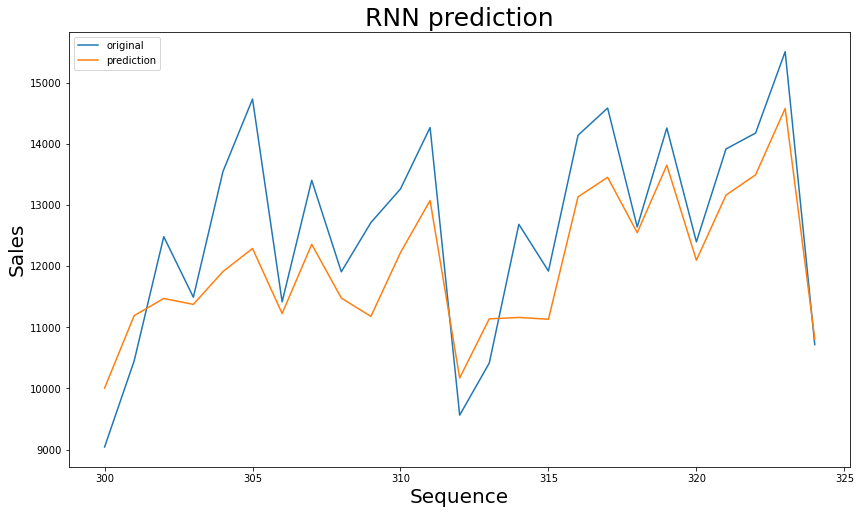

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 22ms/step - loss: 0.0539 - mae: 0.1972


[0.05389830470085144, 0.197183758020401]